# Country Clustering Assignment
### `Selection of Countries using socio-economic and health factors`

## Index of Notebook
1. [Business Objective](#Business-Objective)
2. [Loading Dataset](#Loading-Dataset)
3. [Cleaning Dataset](#Cleaning-Dataset)
4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
5. [Data Preparation ](#Data-Preparation) 
6. [Kmeans clustering](#Kmeans-clustering)
7. [Hierarchical Clustering](#Hierarchical-Clustering)

----

##  1.Business Objective

We need to help the CEO of HELP International, an international humanitarian NGO, in the process of selection of countries they should focus on. The selection will be based on some socio-economic and health factors that determine the overall development of the country.

In other words, it is required to cluster the countries by the factors mentioned above and then present our solution and recommendations to the CEO. We are also supposed to use dimensionality reduction using PCA to get the visualizations of the clusters in a 2-D form.

----

## 2.Loading Dataset

In [328]:
#importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000

In [329]:
df=pd.read_csv(r'C:\Users\Sheetal\Desktop\Clustring_Assignment\Country-data.csv')
df.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [330]:
df1=pd.read_csv(r"C:\Users\Sheetal\Desktop\Clustring_Assignment\data-dictionary+.csv")
df1.head(5)

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita


In [331]:
# Displaying some data from 'Country-data.csv'
df_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [332]:
# Getting deatils for data dictionary
print(f'\nShape of dataframe:\n{df_data.shape}')
print(f'\nCount of dataframe:\n{df_data.count()}')
print(f'\nColumns in dataframe:\n{df_data.columns}')
print(f'\nDescription of dataframe:\n{df_data.describe()}')
print(f'\nNull values in dataframe:\n{df_data.isnull().sum()}')


Shape of dataframe:
(167, 10)

Count of dataframe:
country       167
child_mort    167
exports       167
health        167
imports       167
income        167
inflation     167
life_expec    167
total_fer     167
gdpp          167
dtype: int64

Columns in dataframe:
Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

Description of dataframe:
       child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.75

**Summary**:
1. There are 167 rows and 10 columns in dataframe
2. These 10 columns comprises of measures (numeric value) except the contry name, which anyways is going to be the output column
3. The dataset is clean, i.e. no missing/null values

----

## 3.Cleaning Dataset

In [333]:
# Dropping duplicate values in dataset, if exist
df_data = df_data.drop_duplicates()
print(f'\nShape of dataframe:\n{df_data.shape}')


Shape of dataframe:
(167, 10)


In [334]:
# Getting deatils for df_data dataset
print(f'\nShape of dataframe:\n{df_data.shape}')
print(f'\nCount of dataframe:\n{df_data.count()}')
print(f'\nDatatypes of dataframe:\n{df_data.dtypes}')
print(f'\nColumns in dataframe:\n{df_data.columns}')
print(f'\nDescription of dataframe:\n{df_data.describe()}')
print(f'\nNull values in dataframe:\n{df_data.isnull().sum()}')


Shape of dataframe:
(167, 10)

Count of dataframe:
country       167
child_mort    167
exports       167
health        167
imports       167
income        167
inflation     167
life_expec    167
total_fer     167
gdpp          167
dtype: int64

Datatypes of dataframe:
country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

Columns in dataframe:
Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

Description of dataframe:
       child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min   

In [335]:
# Lets convert the %age Columns to its actual values
df["exports"] = df["exports"]*df["gdpp"]/100
df["health"] = df["health"]*df["gdpp"]/100
df["imports"] = df["imports"]*df["gdpp"]/100
df.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


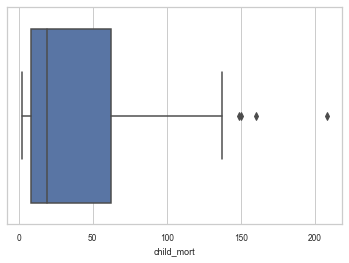

In [336]:
sns.boxplot(df['child_mort'])
plt.show()

In [337]:
df["child_mort"].quantile([0.05, 0.25,0.50,0.75,0.95])

0.05      3.46
0.25      8.25
0.50     19.30
0.75     62.10
0.95    116.00
Name: child_mort, dtype: float64

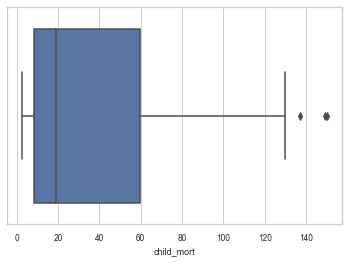

In [338]:
Q1 = df.child_mort.quantile(0.01)
Q3 = df.child_mort.quantile(0.99)
IQR = Q3 - Q1
df = df[(df.child_mort >= Q1) & (df.child_mort <= Q3)]

sns.boxplot(df['child_mort'])
plt.show()

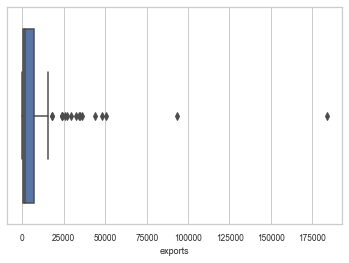

In [339]:
sns.boxplot(df['exports'])
plt.show()

In [340]:
df["exports"].quantile([0.05, 0.25,0.50,0.75,0.95])

0.05       77.5476
0.25      459.2550
0.50     1778.5850
0.75     7002.7500
0.95    31834.0500
Name: exports, dtype: float64

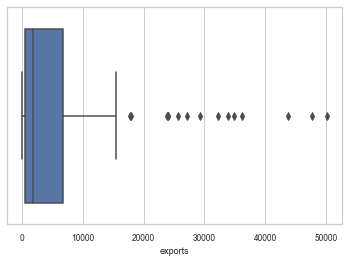

In [341]:
Q1 = df.exports.quantile(0.01)
Q3 = df.exports.quantile(0.99)
IQR = Q3 - Q1
df = df[(df.exports >= Q1) & (df.exports <= Q3)]

sns.boxplot(df['exports'])
plt.show()

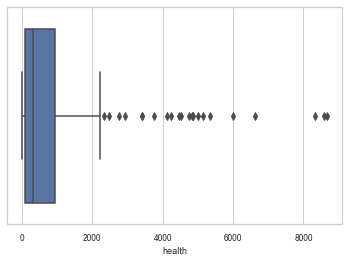

In [342]:
sns.boxplot(df['health'])
plt.show()

In [343]:
df["health"].quantile([0.05, 0.25,0.50,0.75,0.95])

0.05      30.069775
0.25      82.253250
0.50     325.103000
0.75     945.027500
0.95    4857.221500
Name: health, dtype: float64

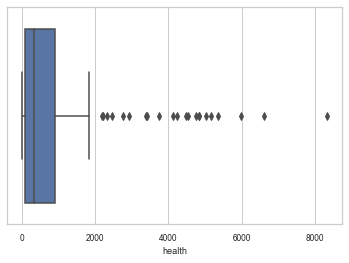

In [344]:
Q1 = df.health.quantile(0.01)
Q3 = df.health.quantile(0.99)
IQR = Q3 - Q1
df = df[(df.health >= Q1) & (df.health <= Q3)]

sns.boxplot(df['health'])
plt.show()

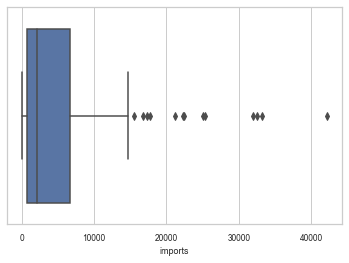

In [345]:
sns.boxplot(df['imports'])
plt.show()

In [346]:
df["imports"].quantile([0.05, 0.25,0.50,0.75,0.95])

0.05      187.125
0.25      713.380
0.50     2093.115
0.75     6626.225
0.95    21468.525
Name: imports, dtype: float64

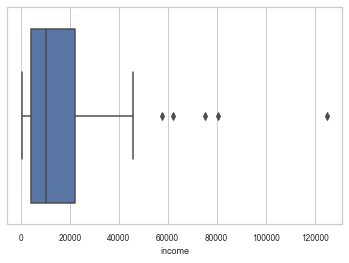

In [347]:
sns.boxplot(df['income'])
plt.show()

In [348]:
df["income"].quantile([0.05, 0.25,0.50,0.75,0.95])

0.05     1315.0
0.25     3962.5
0.50    10180.0
0.75    21925.0
0.95    45325.0
Name: income, dtype: float64

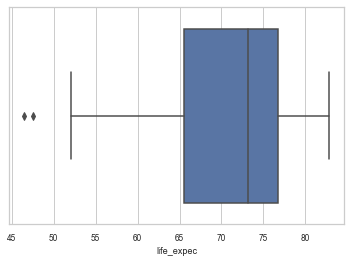

In [349]:
sns.boxplot(df['life_expec'])
plt.show()

In [350]:
df["life_expec"].quantile([0.05, 0.25,0.50,0.75,0.95])

0.05    56.275
0.25    65.475
0.50    73.150
0.75    76.700
0.95    81.075
Name: life_expec, dtype: float64

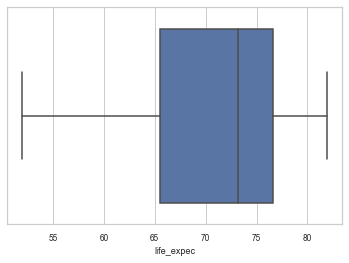

In [351]:
Q1 = df.life_expec.quantile(0.01)
Q3 = df.life_expec.quantile(0.99)
IQR = Q3 - Q1
df = df[(df.life_expec >= Q1) & (df.life_expec <= Q3)]

sns.boxplot(df['life_expec'])
plt.show()

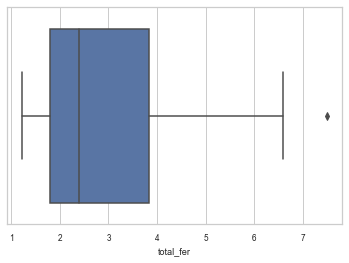

In [352]:
sns.boxplot(df['total_fer'])
plt.show()

In [353]:
df["total_fer"].quantile([0.05, 0.25,0.50,0.75,0.95])

0.05    1.3900
0.25    1.7975
0.50    2.3950
0.75    3.8425
0.95    5.8535
Name: total_fer, dtype: float64

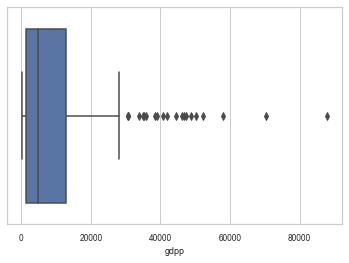

In [354]:
sns.boxplot(df['gdpp'])
plt.show()

In [355]:
df["gdpp"].quantile([0.05, 0.25,0.50,0.75,0.95])

0.05      557.95
0.25     1487.50
0.50     4670.00
0.75    12950.00
0.95    46515.00
Name: gdpp, dtype: float64

In [356]:
# Lets remove the country column
df_country_drop = df.copy()
country = df_country_drop.pop("country")
df_country_drop.head(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [357]:
country.head(5)

0            Afghanistan
1                Albania
2                Algeria
3                 Angola
4    Antigua and Barbuda
Name: country, dtype: object

----

## 4.Exploratory Data Analysis

In [358]:
high_mortality=df_data[df_data['child_mort']>df.child_mort.mean()]
print(len(high_mortality))

60


In [359]:
t10_child_mort = high_mortality[['country','child_mort']].sort_values('child_mort',ascending = False).head(10)

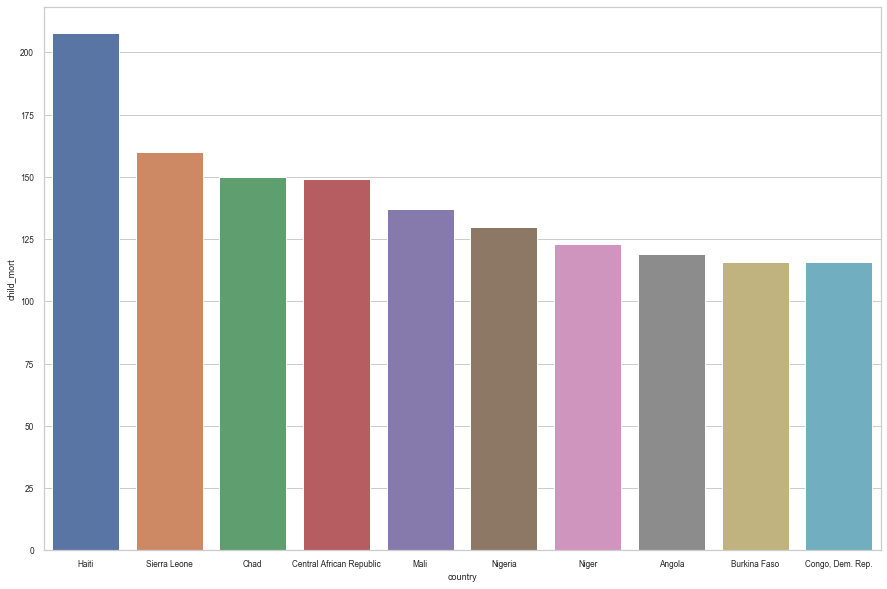

In [360]:
plt.figure(figsize=(15,10))
sns.barplot(x='country', y='child_mort',data=t10_child_mort)
plt.xlabel='country'
plt.ylabel='Child Mortality Rate'
plt.show()

### From above plot it is clear that the Haiti, Sierra Leone, Chad, African Republic have high mortality rate .

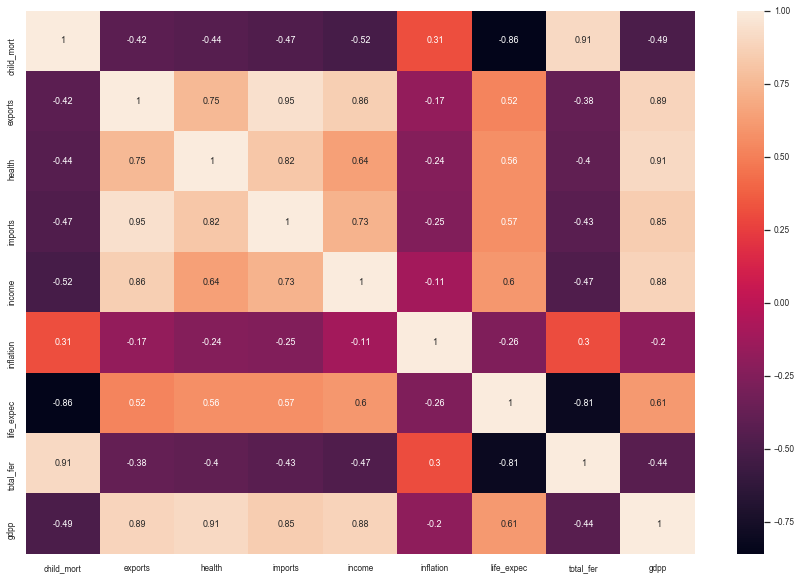

In [361]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Here we can see the Income, Life_expectency are majorly affecting a countries GDP


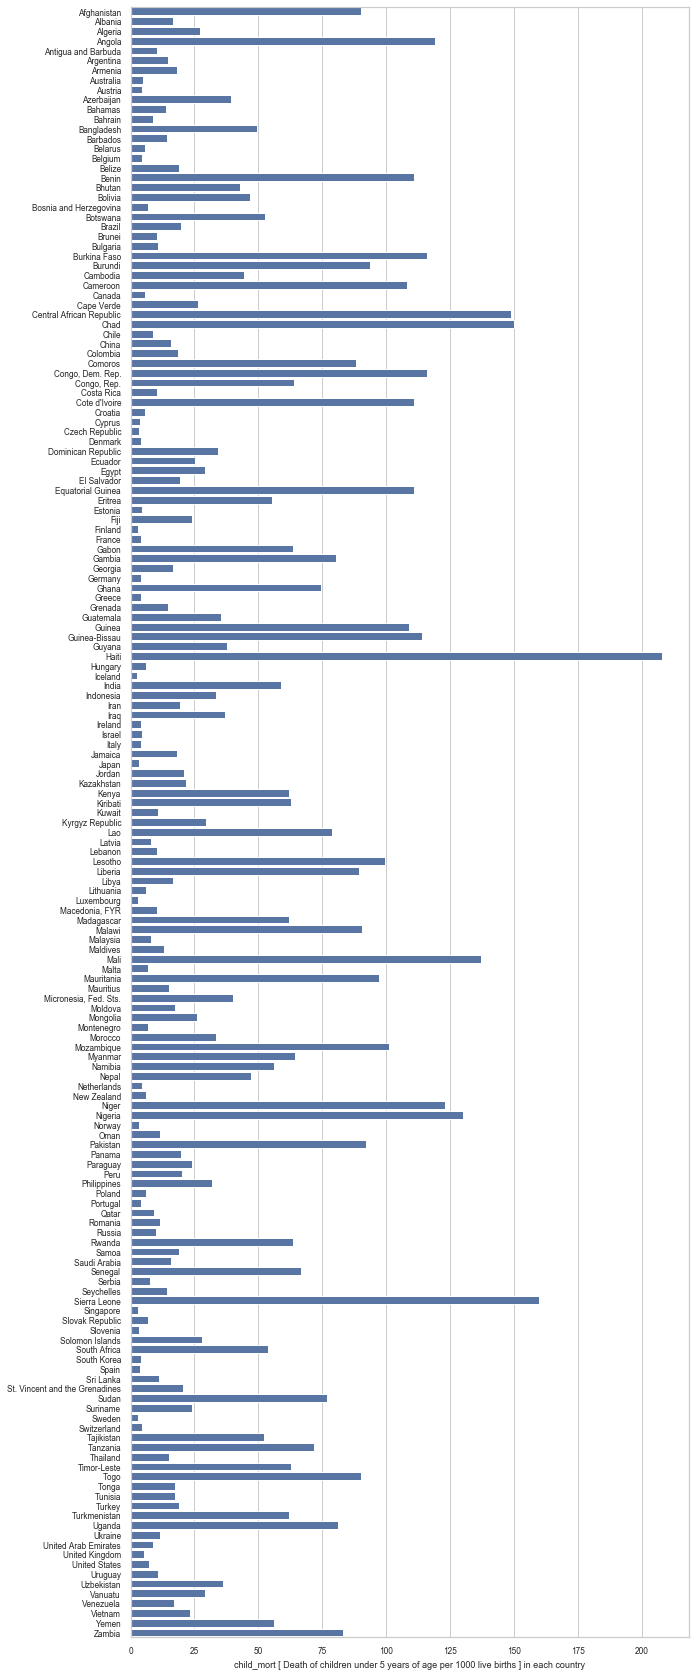

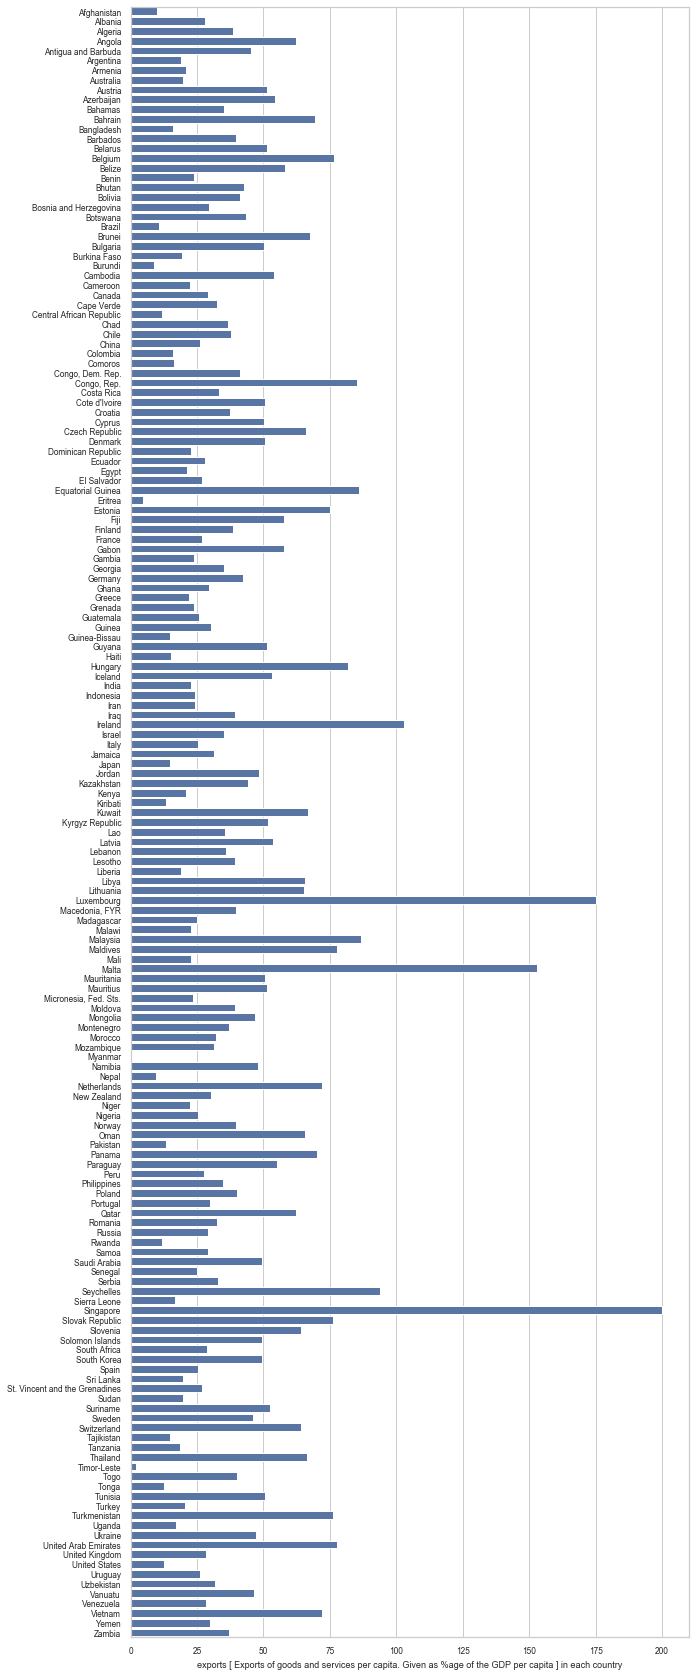

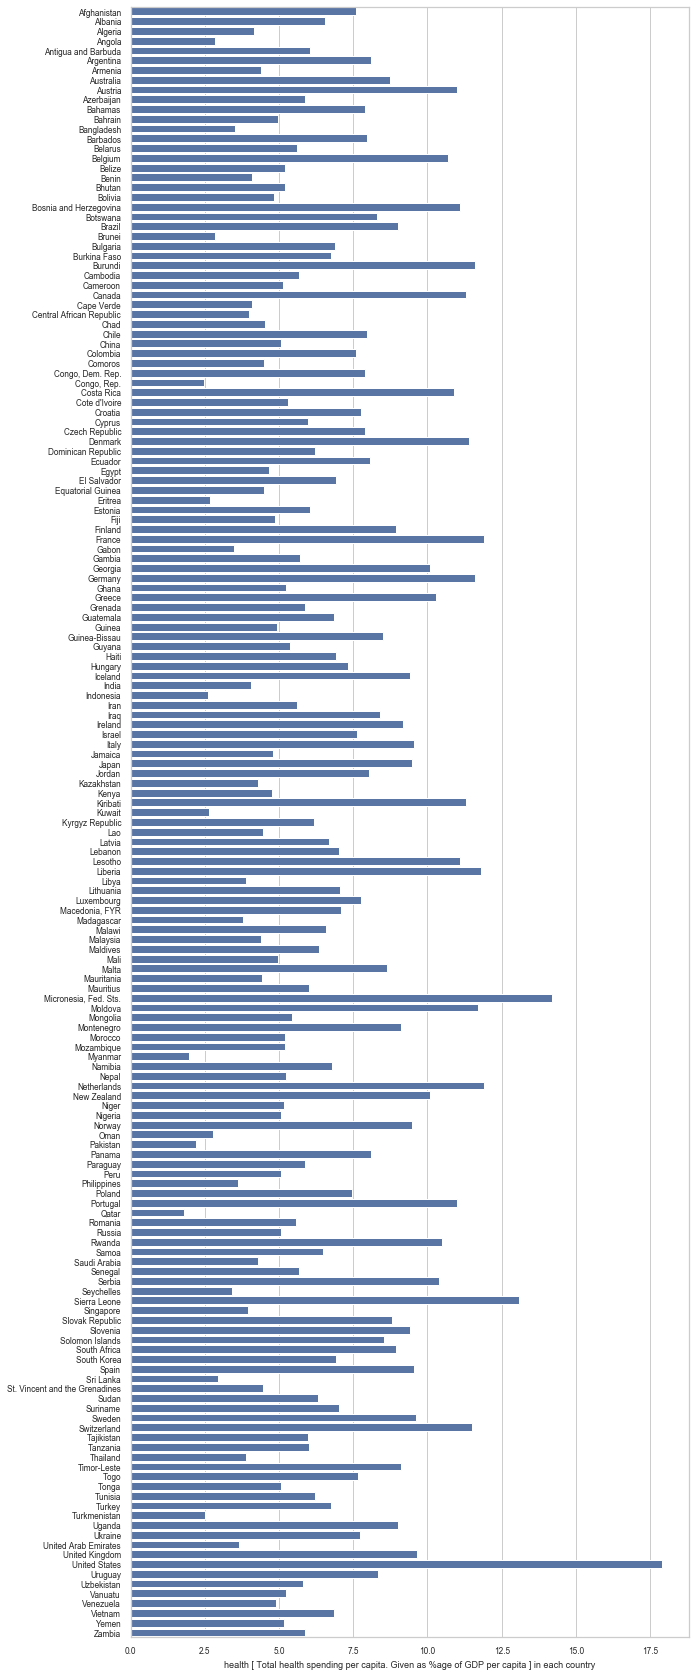

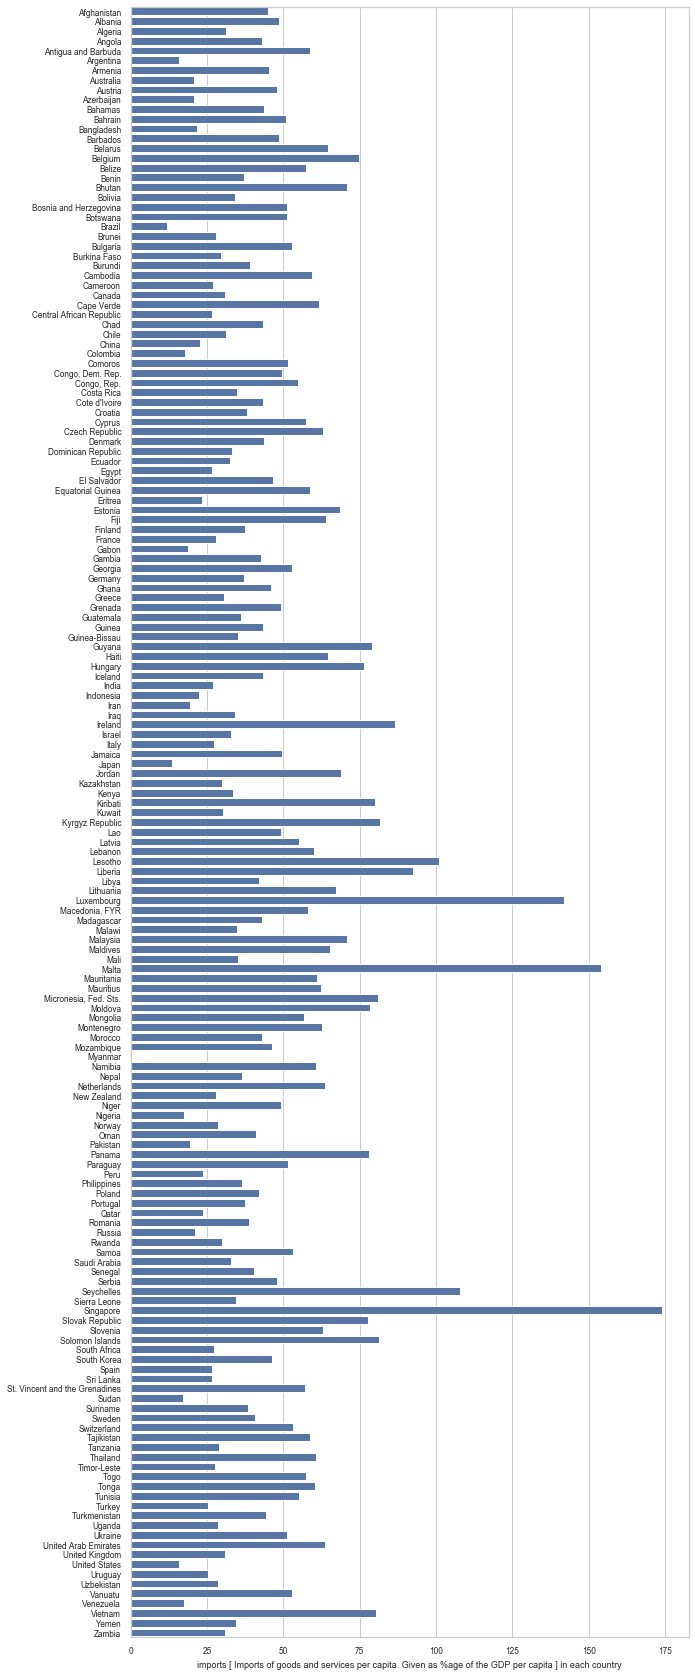

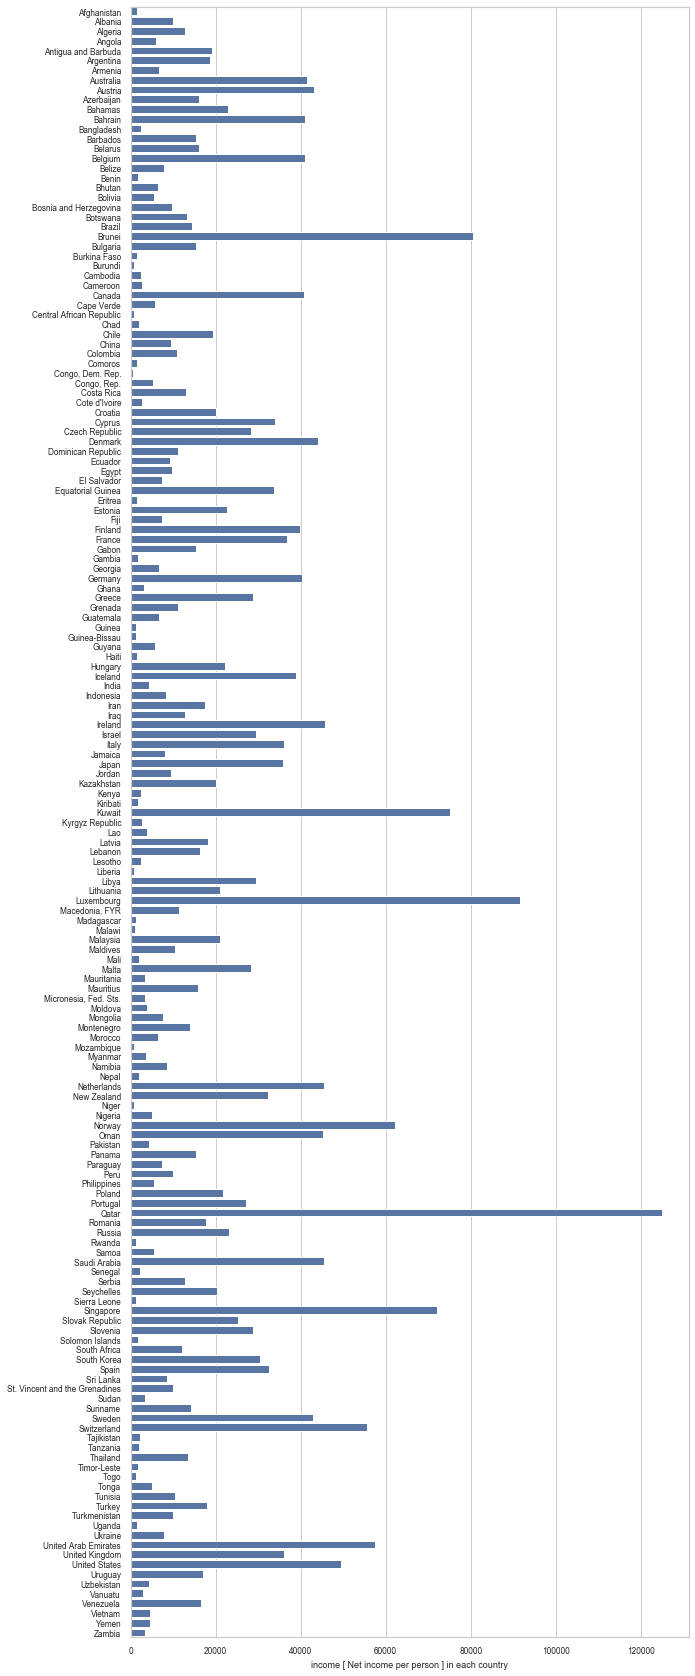

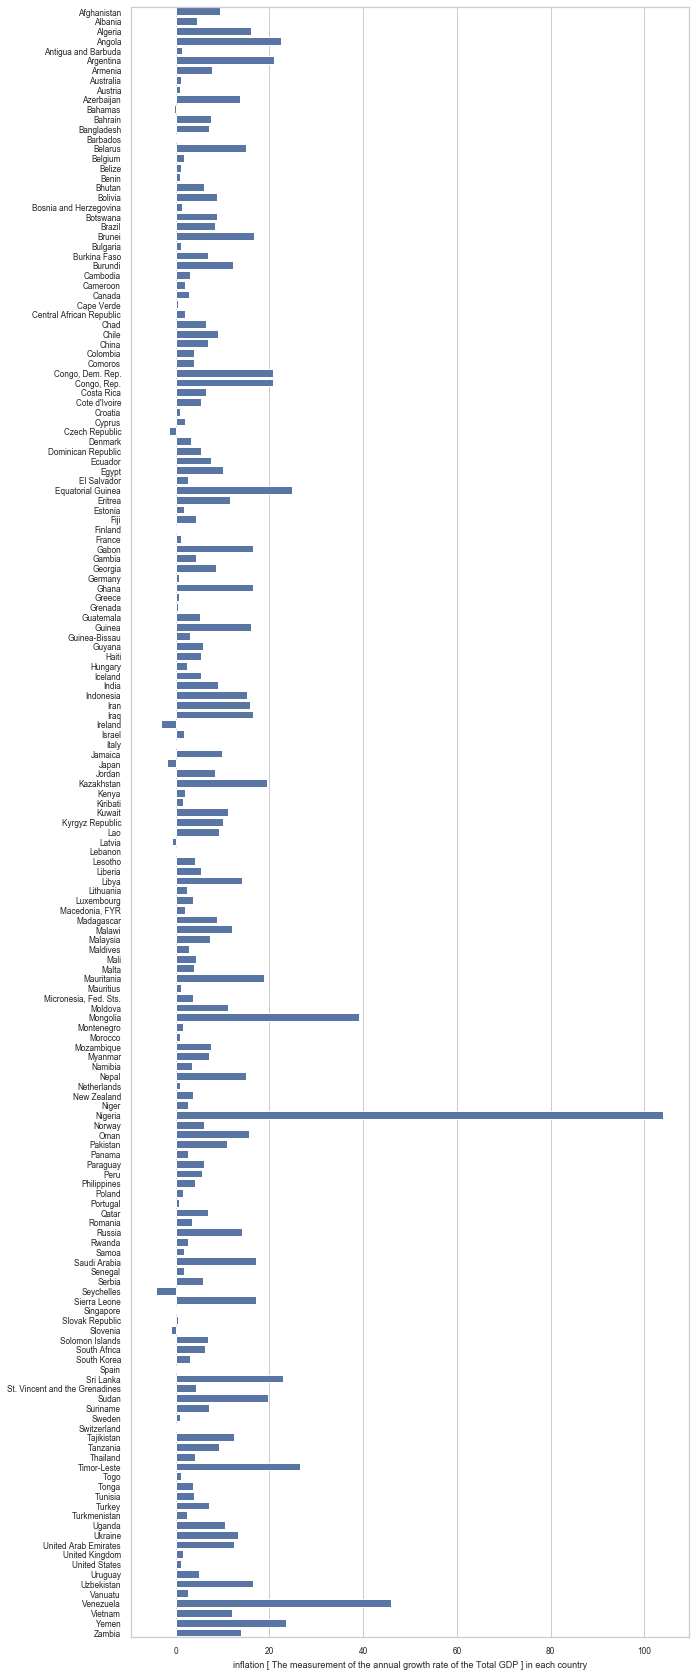

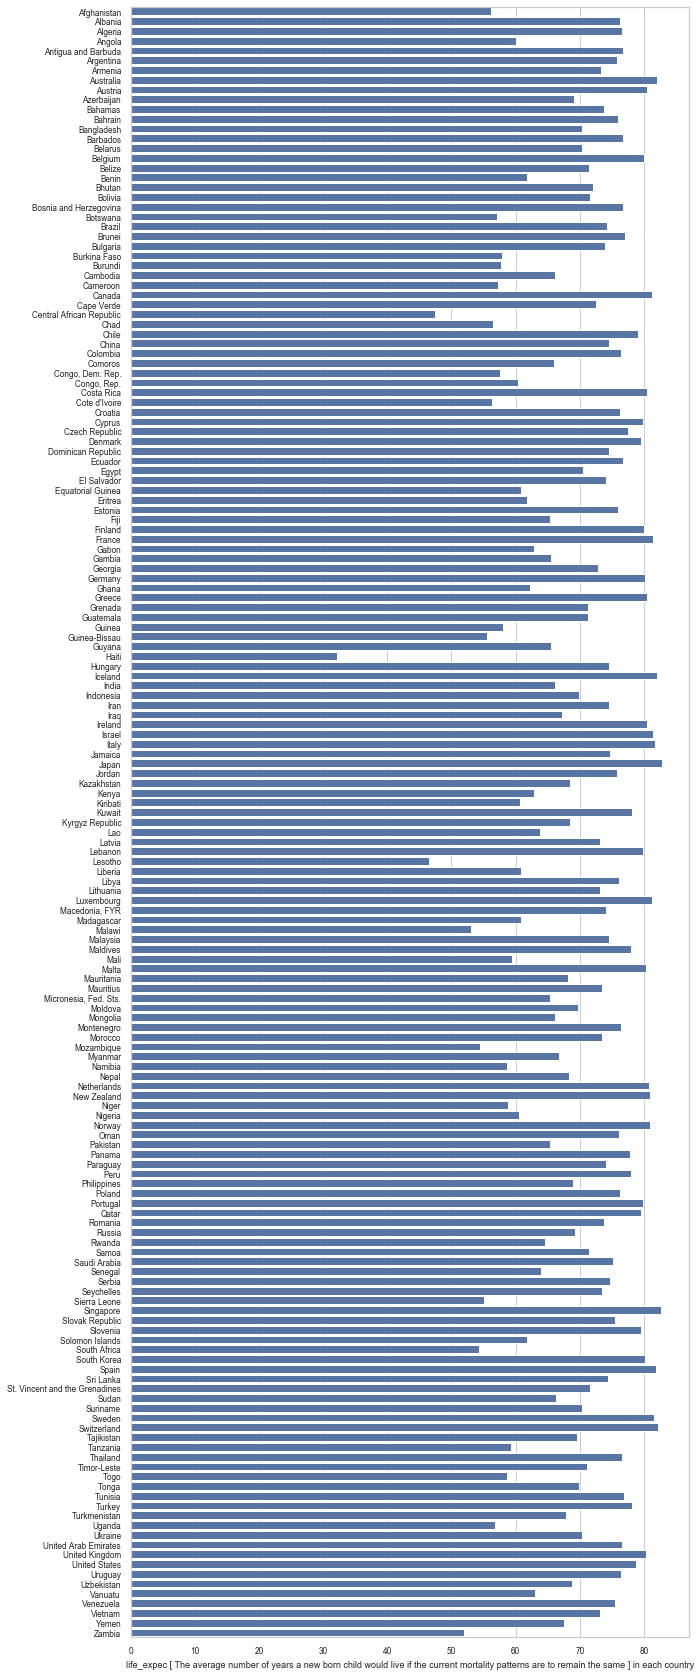

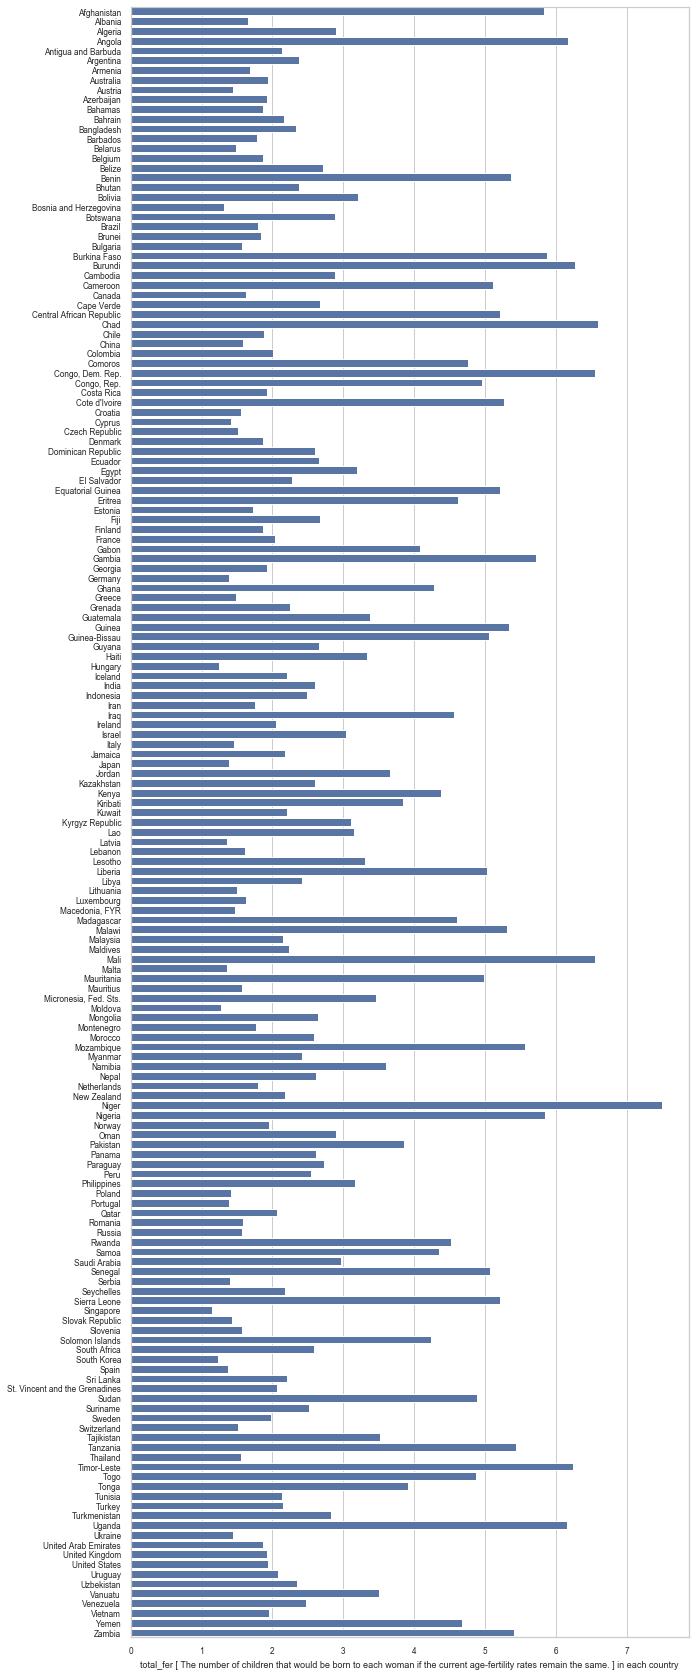

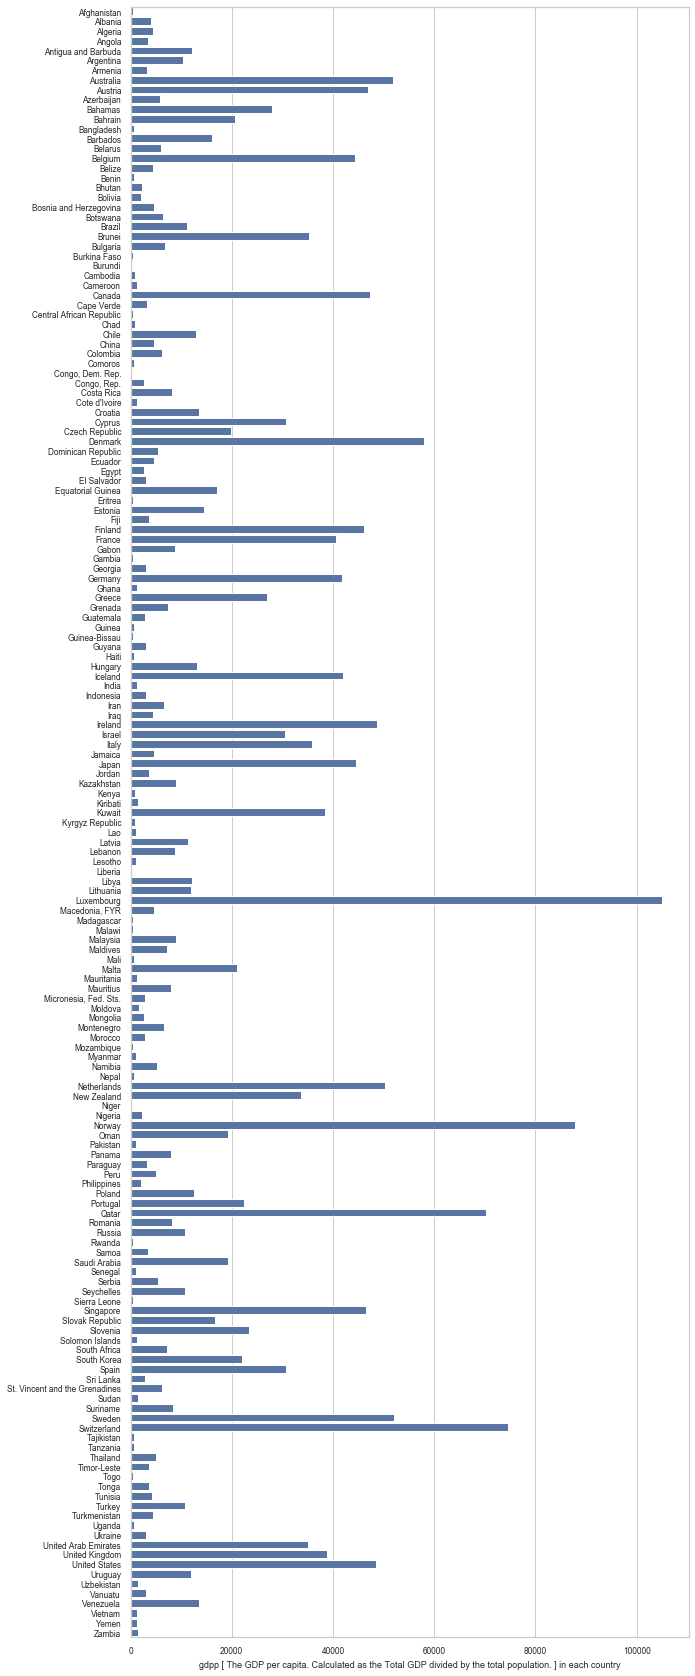

In [362]:
# NUMERICAL COLUMN ANALYSIS (Barplot)
for i, col in enumerate(num_col):
    bivariate_analysis(i, col, 'country')

----

## 5.Data Preparation

#### Lets Standardise the data so that we can have a distribution at mean=0 and variance = 1

In [363]:
scaler=StandardScaler()
df_country_scaled=scaler.fit_transform(df_country_drop)
df_country_scaled

array([[ 1.50687316, -0.6252527 , -0.5792463 , ..., -1.91085828,
         1.92794462, -0.7089661 ],
       [-0.53911216, -0.50480619, -0.42601367, ...,  0.694718  ,
        -0.85567365, -0.47980434],
       [-0.24166592, -0.44209753, -0.48155787, ...,  0.72064413,
        -0.02793104, -0.45583209],
       ...,
       [-0.35286078, -0.52712951, -0.5469106 , ...,  0.27989989,
        -0.65541334, -0.65992017],
       [ 0.56449677, -0.58793296, -0.5616563 , ..., -0.44603181,
         1.16028011, -0.65992017],
       [ 1.3095023 , -0.57166566, -0.5493585 , ..., -2.45530706,
         1.64758019, -0.65020169]])

In [364]:
df_country_scaled.shape

(152, 9)

In [365]:
df_country_scaled=pd.DataFrame(df_country_scaled)
df_country_scaled.columns = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
df_country_scaled.head(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.506873,-0.625253,-0.579246,-0.670297,-0.829499,0.129043,-1.910858,1.927945,-0.708966
1,-0.539112,-0.504806,-0.426014,-0.433251,-0.357066,-0.325306,0.694718,-0.855674,-0.479804
2,-0.241666,-0.442098,-0.481558,-0.513286,-0.188422,0.740349,0.720644,-0.027931,-0.455832
3,2.307476,-0.388328,-0.539451,-0.497760,-0.585901,1.318610,-1.405299,2.154906,-0.516087
4,-0.714244,-0.017915,-0.108828,0.275126,0.163631,-0.605258,0.759533,-0.535257,0.045641


## Hopkins Statistics

##### Used to determine if we can create clusters


##### running hopkins statistics on a copied scaled dataframe.

----

In [366]:
df_scaled=df_country_scaled
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.506873,-0.625253,-0.579246,-0.670297,-0.829499,0.129043,-1.910858,1.927945,-0.708966
1,-0.539112,-0.504806,-0.426014,-0.433251,-0.357066,-0.325306,0.694718,-0.855674,-0.479804
2,-0.241666,-0.442098,-0.481558,-0.513286,-0.188422,0.740349,0.720644,-0.027931,-0.455832
3,2.307476,-0.388328,-0.539451,-0.497760,-0.585901,1.318610,-1.405299,2.154906,-0.516087
4,-0.714244,-0.017915,-0.108828,0.275126,0.163631,-0.605258,0.759533,-0.535257,0.045641


In [367]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H


In [368]:
hopkins(df_scaled)

0.8267466285119974

**Note**: According to external reference, a value for higher than 0.85 indicates a clustering tendency at the 90% confidence level. Thus we are good to proceed with K-Means Clustering

## 6. Kmeans Clustering
##### Lets create a seperate dataframe only for kmeans

In [369]:
df_country_kmeans = df_country_scaled
df_country_kmeans.head(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.506873,-0.625253,-0.579246,-0.670297,-0.829499,0.129043,-1.910858,1.927945,-0.708966
1,-0.539112,-0.504806,-0.426014,-0.433251,-0.357066,-0.325306,0.694718,-0.855674,-0.479804
2,-0.241666,-0.442098,-0.481558,-0.513286,-0.188422,0.740349,0.720644,-0.027931,-0.455832
3,2.307476,-0.388328,-0.539451,-0.497760,-0.585901,1.318610,-1.405299,2.154906,-0.516087
4,-0.714244,-0.017915,-0.108828,0.275126,0.163631,-0.605258,0.759533,-0.535257,0.045641


In [370]:
#Lets start with a random number of clusters
kmeans = KMeans(n_clusters=3, max_iter=150)
kmeans.fit(df_country_kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [371]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0,
       1, 0, 2, 0, 2, 1, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0, 1, 0, 0,
       0, 0, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 1, 1, 1, 0, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2,
       1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 1, 0, 0, 2, 0, 1,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 2, 2])

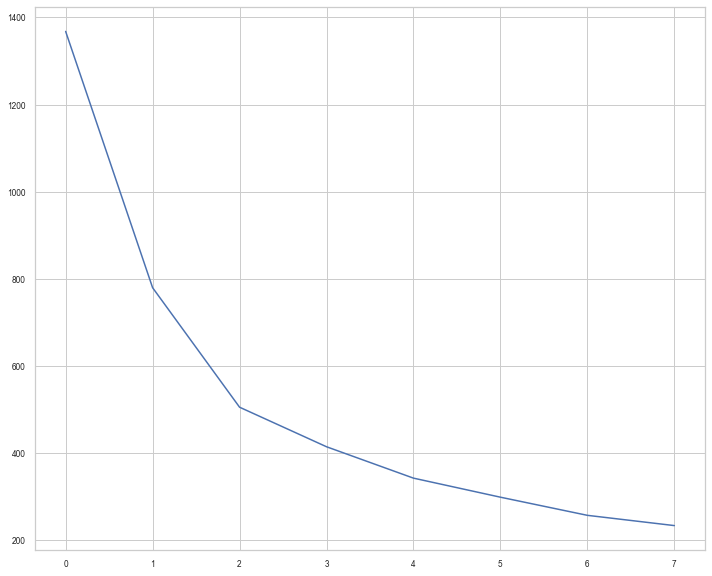

In [372]:
#lets find the optimum number of clusters
# elbow-curve/SSD
ssd = []
range_n_clusters = [1,2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_country_kmeans)
    
    ssd.append(kmeans.inertia_)
plt.figure(figsize=[12,10])
plt.plot(ssd)

**Note**: From the above plots, we conclude that the optimal value of K (number of clusters) could be between 5, 6 or 7.

#### Here we can see that the curve decreases steeply around 3-4. Lets take silhouette Curve into consideration for a better understanding.

### Sillhouette analysis

In [373]:
#sillhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_country_kmeans)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_country_kmeans, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.48504110835135966
For n_clusters=3, the silhouette score is 0.42979974816386696
For n_clusters=4, the silhouette score is 0.40853648550667243
For n_clusters=5, the silhouette score is 0.3970370145150282
For n_clusters=6, the silhouette score is 0.3106331572713661
For n_clusters=7, the silhouette score is 0.3170760514341467
For n_clusters=8, the silhouette score is 0.3141376202506738


Here we can see the optimal Number of clusters is 3

In [374]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df_country_kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [375]:
kmeans.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0, 2,
       1, 2, 0, 2, 0, 1, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 2,
       2, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 1, 1, 1, 2, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0,
       1, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 0, 0, 2, 1, 2, 2, 0, 2, 1,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [376]:
df_country_scaled["kmeans_cluster"] = kmeans.labels_
df_country_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_cluster
0,1.506873,-0.625253,-0.579246,-0.670297,-0.829499,0.129043,-1.910858,1.927945,-0.708966,0
1,-0.539112,-0.504806,-0.426014,-0.433251,-0.357066,-0.325306,0.694718,-0.855674,-0.479804,2
2,-0.241666,-0.442098,-0.481558,-0.513286,-0.188422,0.740349,0.720644,-0.027931,-0.455832,2
3,2.307476,-0.388328,-0.539451,-0.497760,-0.585901,1.318610,-1.405299,2.154906,-0.516087,0
4,-0.714244,-0.017915,-0.108828,0.275126,0.163631,-0.605258,0.759533,-0.535257,0.045641,2
5,-0.597489,-0.416231,-0.041941,-0.479549,0.140918,1.180929,0.629903,-0.375049,-0.077459,2
6,-0.497414,-0.557348,-0.511599,-0.505352,-0.540475,-0.024242,0.305826,-0.828972,-0.536172,2
7,-0.881036,2.027510,2.890584,2.350954,1.532094,-0.657301,1.239167,-0.995856,2.293850,1
8,0.089139,-0.280919,-0.374820,-0.539391,-0.012395,0.529237,-0.238623,-0.675439,-0.366422,2
9,-0.616949,0.451649,0.890361,0.963353,0.379405,-0.773504,0.370641,-0.715491,1.069321,2


In [377]:
df_country_scaled.kmeans_cluster.value_counts()

2    88
0    41
1    23
Name: kmeans_cluster, dtype: int64

In [378]:
df_country_scaled.loc[df_country_scaled["kmeans_cluster"]==0]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_cluster
0,1.506873,-0.625253,-0.579246,-0.670297,-0.829499,0.129043,-1.910858,1.927945,-0.708966,0
3,2.307476,-0.388328,-0.539451,-0.497760,-0.585901,1.318610,-1.405299,2.154906,-0.516087,0
16,2.085086,-0.611427,-0.586596,-0.665707,-0.817574,-0.656200,-1.184927,1.620879,-0.695684,0
20,0.458862,-0.325402,-0.250284,-0.260205,-0.165709,0.081314,-1.794191,-0.034606,-0.333379,0
24,2.224080,-0.619164,-0.581391,-0.680940,-0.839719,-0.112358,-1.690486,1.961321,-0.707541,0
26,2.001690,-0.599225,-0.562100,-0.655933,-0.769877,-0.562118,-1.768265,1.453995,-0.659920,0
29,3.169236,-0.594885,-0.580116,-0.650959,-0.811328,-0.150909,-1.871969,2.441946,-0.686678,0
33,1.451276,-0.617342,-0.584153,-0.649954,-0.840855,-0.382214,-0.653441,1.213683,-0.694971,0
34,2.224080,-0.616194,-0.589755,-0.681558,-0.886338,1.171750,-1.742338,2.408569,-0.723155,0
35,0.775767,-0.373680,-0.561964,-0.499885,-0.626216,1.162572,-1.366410,1.347190,-0.567271,0


In [379]:
df_country_scaled.loc[df_country_scaled["kmeans_cluster"]==1]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_cluster
7,-0.881036,2.027510,2.890584,2.350954,1.532094,-0.657301,1.239167,-0.995856,2.293850,1
14,-0.875477,3.117364,2.613789,3.815742,1.412850,-0.564871,1.174351,-0.715491,2.131875,1
22,-0.708684,1.997948,0.072126,0.642829,3.655767,0.795421,0.798423,-0.728842,1.542287,1
27,-0.844898,0.892966,3.024303,1.298322,1.390137,-0.474001,1.342871,-0.869024,2.326245,1
39,-0.900495,1.077321,0.639171,1.709334,1.004015,-0.552939,1.161388,-1.009207,1.250733,1
41,-0.886596,2.605519,3.875846,2.742042,1.577520,-0.441876,1.109536,-0.708816,3.013017,1
49,-0.917175,1.344516,2.196155,1.650571,1.339033,-0.705214,1.174351,-0.708816,2.248497,1
50,-0.883816,0.571090,2.668443,0.850597,1.174363,-0.641055,1.355834,-0.602011,1.885674,1
54,-0.883816,1.322635,2.680242,1.409224,1.373102,-0.667857,1.187315,-1.029233,1.963422,1
67,-0.883816,4.912005,2.427132,5.036608,1.674051,-1.032988,1.226204,-0.588660,2.410472,1


In [380]:
df_country_scaled.loc[df_country_scaled["kmeans_cluster"]==2]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_cluster
1,-0.539112,-0.504806,-0.426014,-0.433251,-0.357066,-0.325306,0.694718,-0.855674,-0.479804,2
2,-0.241666,-0.442098,-0.481558,-0.513286,-0.188422,0.740349,0.720644,-0.027931,-0.455832,2
4,-0.714244,-0.017915,-0.108828,0.275126,0.163631,-0.605258,0.759533,-0.535257,0.045641,2
5,-0.597489,-0.416231,-0.041941,-0.479549,0.140918,1.180929,0.629903,-0.375049,-0.077459,2
6,-0.497414,-0.557348,-0.511599,-0.505352,-0.540475,-0.024242,0.305826,-0.828972,-0.536172,2
8,0.089139,-0.280919,-0.374820,-0.539391,-0.012395,0.529237,-0.238623,-0.675439,-0.366422,2
9,-0.616949,0.451649,0.890361,0.963353,0.379405,-0.773504,0.370641,-0.715491,1.069321,2
10,-0.761502,0.958510,0.089940,0.731723,1.412850,-0.054532,0.655829,-0.515231,0.596355,2
11,0.372686,-0.617961,-0.589578,-0.681615,-0.782369,-0.082068,-0.070103,-0.401750,-0.695684,2
12,-0.605829,0.067069,0.257027,0.357737,-0.052143,-0.707968,0.746570,-0.768894,0.291843,2


In [381]:
df["kmeans_cluster"]=kmeans.labels_
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_cluster
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553,0
1,Albania,16.6,1145.2000,267.8950,1987.740,9930,4.490,76.3,1.65,4090,2
2,Algeria,27.3,1712.6400,185.9820,1400.440,12900,16.100,76.5,2.89,4460,2
3,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.400,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.0000,735.6600,7185.800,19100,1.440,76.8,2.13,12200,2
5,Argentina,14.5,1946.7000,834.3000,1648.000,18700,20.900,75.8,2.37,10300,2
6,Armenia,18.1,669.7600,141.6800,1458.660,6700,7.770,73.3,1.69,3220,2
8,Austria,4.3,24059.7000,5159.0000,22418.200,43200,0.873,80.5,1.44,46900,1
9,Azerbaijan,39.2,3171.1200,343.3920,1208.880,16000,13.800,69.1,1.92,5840,2
10,Bahamas,13.8,9800.0000,2209.2000,12236.000,22900,-0.393,73.8,1.86,28000,2


In [382]:
df.kmeans_cluster.value_counts()

2    88
0    41
1    23
Name: kmeans_cluster, dtype: int64

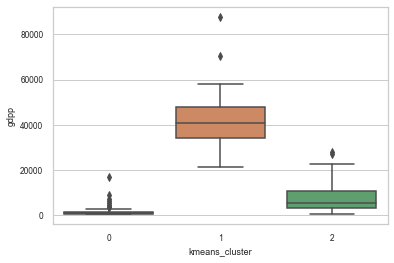

In [383]:
sns.boxplot(x="kmeans_cluster",y="gdpp",data=df)
plt.show()

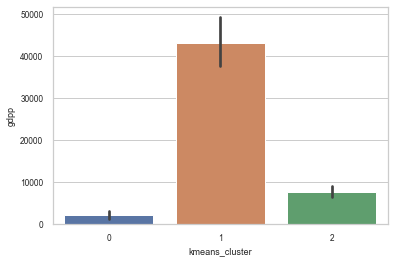

In [384]:
sns.barplot(x="kmeans_cluster",y="gdpp",data=df)
plt.show()

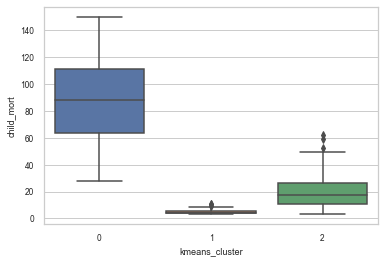

In [385]:
sns.boxplot(x="kmeans_cluster",y="child_mort",data=df)
plt.show()

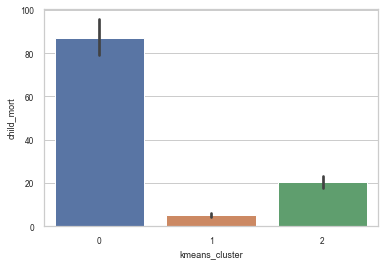

In [386]:
sns.barplot(x="kmeans_cluster",y="child_mort",data=df)
plt.show()

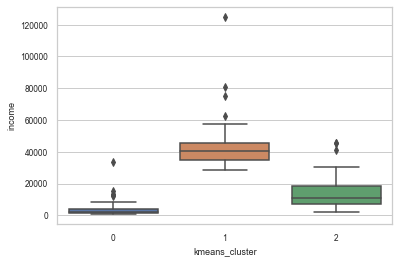

In [387]:
sns.boxplot(x="kmeans_cluster",y="income",data=df)
plt.show()

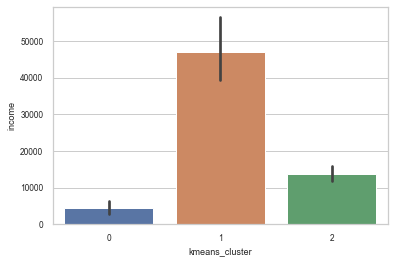

In [388]:
sns.barplot(x="kmeans_cluster",y="income",data=df)
plt.show()

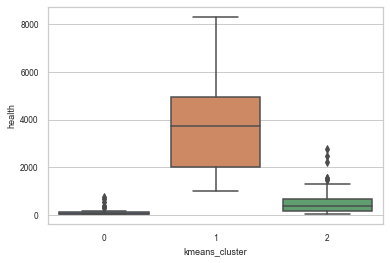

In [389]:
sns.boxplot(x="kmeans_cluster",y="health",data=df)
plt.show()

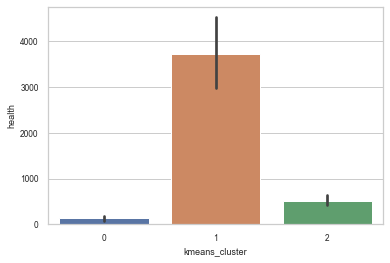

In [390]:
sns.barplot(x="kmeans_cluster",y="health",data=df)
plt.show()

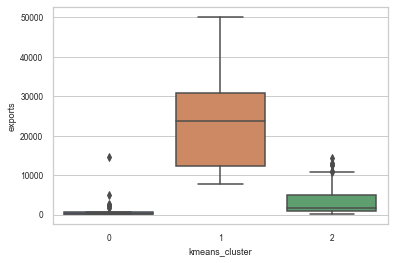

In [391]:
sns.boxplot(x="kmeans_cluster",y="exports",data=df)
plt.show()

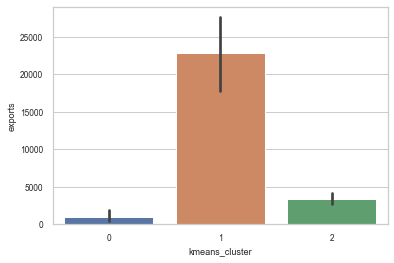

In [392]:
sns.barplot(x="kmeans_cluster",y="exports",data=df)
plt.show()

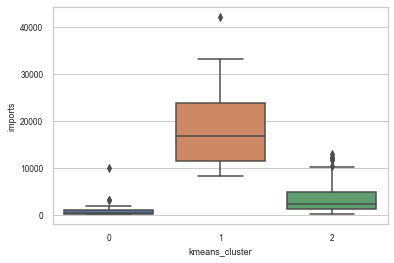

In [393]:
sns.boxplot(x="kmeans_cluster",y="imports",data=df)
plt.show()

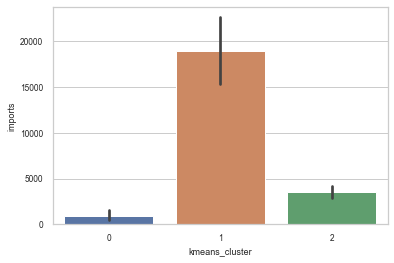

In [394]:
sns.barplot(x="kmeans_cluster",y="imports",data=df)
plt.show()

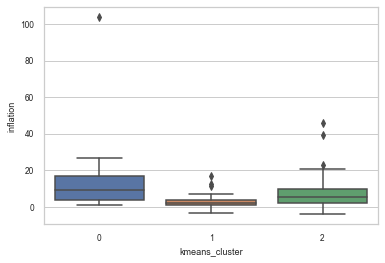

In [395]:
sns.boxplot(x="kmeans_cluster",y="inflation",data=df)
plt.show()

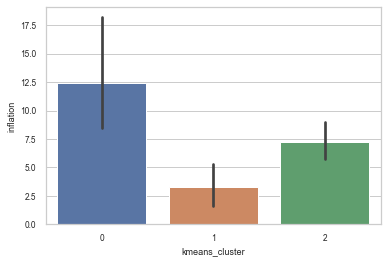

In [396]:
sns.barplot(x="kmeans_cluster",y="inflation",data=df)
plt.show()


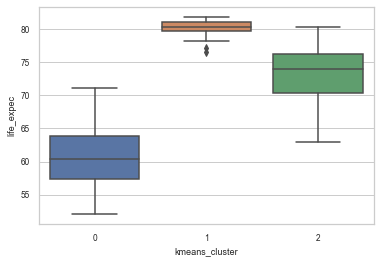

In [397]:
sns.boxplot(x="kmeans_cluster",y="life_expec",data=df)
plt.show()

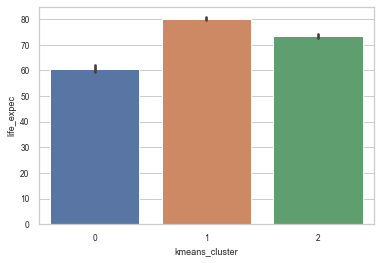

In [398]:
sns.barplot(x="kmeans_cluster",y="life_expec",data=df)
plt.show()

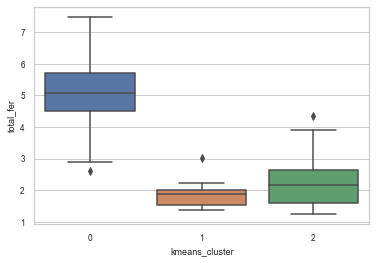

In [399]:
sns.boxplot(x="kmeans_cluster",y="total_fer",data=df)
plt.show()

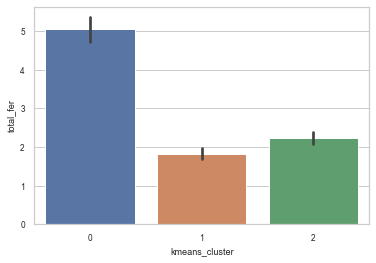

In [400]:
sns.barplot(x="kmeans_cluster",y="total_fer",data=df)
plt.show()

In [401]:
df.loc[df["kmeans_cluster"]==1]['country']

8                   Austria
15                  Belgium
23                   Brunei
29                   Canada
42                   Cyprus
44                  Denmark
53                  Finland
54                   France
58                  Germany
73                  Ireland
74                   Israel
75                    Italy
82                   Kuwait
98                    Malta
110             Netherlands
111             New Zealand
114                  Norway
123                   Qatar
135                Slovenia
139                   Spain
144                  Sweden
157    United Arab Emirates
158          United Kingdom
Name: country, dtype: object

In [402]:
df.loc[df["kmeans_cluster"]==0]['country']

0            Afghanistan
3                 Angola
17                 Benin
21              Botswana
25          Burkina Faso
28              Cameroon
32                  Chad
36               Comoros
37      Congo, Dem. Rep.
38           Congo, Rep.
40         Cote d'Ivoire
49     Equatorial Guinea
55                 Gabon
56                Gambia
59                 Ghana
63                Guinea
64         Guinea-Bissau
72                  Iraq
80                 Kenya
81              Kiribati
84                   Lao
88               Liberia
94                Malawi
97                  Mali
99            Mauritania
106           Mozambique
108              Namibia
112                Niger
113              Nigeria
116             Pakistan
126               Rwanda
129              Senegal
136      Solomon Islands
137         South Africa
142                Sudan
147             Tanzania
149          Timor-Leste
150                 Togo
155               Uganda
165                Yemen


In [403]:
df.loc[df["kmeans_cluster"]==2]['country']

1                             Albania
2                             Algeria
4                 Antigua and Barbuda
5                           Argentina
6                             Armenia
9                          Azerbaijan
10                            Bahamas
11                            Bahrain
12                         Bangladesh
13                           Barbados
14                            Belarus
16                             Belize
18                             Bhutan
19                            Bolivia
20             Bosnia and Herzegovina
22                             Brazil
24                           Bulgaria
27                           Cambodia
30                         Cape Verde
33                              Chile
34                              China
35                           Colombia
39                         Costa Rica
41                            Croatia
43                     Czech Republic
45                 Dominican Republic
46          

In [ ]:
df.groupby('kmeans_cluster').mean()

----

#### Here we can see that in clusterings, 
#### Cluster 0 - countries with lowest GDPP
#### Cluster 1 - countries with below Highest GDPP
#### Cluster 2 - countries with above Average GDPP


#### Here we can see that Cluster 0 -> has higher number of children dying below age of 5 per 1000 births. as they seem to be spending less on their health systems. We will also have to increase the average income of the people in the country.

In [453]:
df.groupby('kmeans_cluster').apply(lambda x: x.sort_values('gdpp'))

country  child_mort     exports  \
kmeans_cluster                                                               
0              88                          Liberia        89.3     62.4570   
               37                 Congo, Dem. Rep.       116.0    137.2740   
               112                           Niger       123.0     77.2560   
               106                      Mozambique       101.0    131.9850   
               94                           Malawi        90.5    104.6520   
               150                            Togo        90.3    196.1760   
               64                    Guinea-Bissau       114.0     81.5030   
               0                       Afghanistan        90.2     55.3000   
               56                           Gambia        80.3    133.7560   
               126                          Rwanda        63.6     67.5600   
               25                     Burkina Faso       116.0    110.4000   
               155                          Uganda        81.0    101.7450   
               63                           Guinea       109.0    196.3440   
               147                        Tanzania        71.9    131.2740   
               97                             Mali       137.0    161.4240   
               17                            Benin       111.0    180.4040   
               36                          Comoros        88.2    126.8850   
               32                             Chad       150.0    330.0960   
               80                            Kenya        62.2    200.1690   
               129                         Senegal        66.8    249.0000   
               116                        Pakistan        92.1    140.4000   
               84                              Lao        78.9    403.5600   
               99                       Mauritania        97.4    608.4000   
               40                    Cote d'Ivoire       111.0    617.3200   
               136                 Solomon Islands        28.1    635.9700   
               28                         Cameroon       108.0    290.8200   
               59                            Ghana        74.7    386.4500   
               165                           Yemen        56.3    393.0000   
               166                          Zambia        83.1    540.2000   
               142                           Sudan        76.7    291.5600   
               81                         Kiribati        62.7    198.1700   
               113                         Nigeria       130.0    589.4900   
               38                      Congo, Rep.        63.9   2331.7400   
               3                            Angola       119.0   2199.1900   
               149                     Timor-Leste        62.6     79.2000   
               72                             Iraq        36.9   1773.0000   
               108                         Namibia        56.0   2480.8200   
               21                         Botswana        52.5   2768.6000   
               137                    South Africa        53.7   2082.0800   
               55                            Gabon        63.7   5048.7500   
               49                Equatorial Guinea       111.0  14671.8000   
1              98                            Malta         6.8  32283.0000   
               135                        Slovenia         3.2  15046.2000   
               74                           Israel         4.6  10710.0000   
               139                           Spain         3.8   7828.5000   
               42                           Cyprus         3.6  15461.6000   
               111                     New Zealand         6.2  10211.1000   
               157            United Arab Emirates         8.6  27195.0000   
               23                           Brunei        10.5  23792.2000   
               75                            Italy         4.0   

In [406]:
df.groupby('kmeans_cluster').apply(lambda x: x.sort_values('income'))

country  child_mort     exports  \
kmeans_cluster                                                               
0              37                 Congo, Dem. Rep.       116.0    137.2740   
               88                          Liberia        89.3     62.4570   
               112                           Niger       123.0     77.2560   
               106                      Mozambique       101.0    131.9850   
               94                           Malawi        90.5    104.6520   
               63                           Guinea       109.0    196.3440   
               150                            Togo        90.3    196.1760   
               126                          Rwanda        63.6     67.5600   
               64                    Guinea-Bissau       114.0     81.5030   
               36                          Comoros        88.2    126.8850   
               25                     Burkina Faso       116.0    110.4000   
               155                          Uganda        81.0    101.7450   
               0                       Afghanistan        90.2     55.3000   
               56                           Gambia        80.3    133.7560   
               81                         Kiribati        62.7    198.1700   
               136                 Solomon Islands        28.1    635.9700   
               17                            Benin       111.0    180.4040   
               149                     Timor-Leste        62.6     79.2000   
               97                             Mali       137.0    161.4240   
               32                             Chad       150.0    330.0960   
               147                        Tanzania        71.9    131.2740   
               129                         Senegal        66.8    249.0000   
               80                            Kenya        62.2    200.1690   
               28                         Cameroon       108.0    290.8200   
               40                    Cote d'Ivoire       111.0    617.3200   
               59                            Ghana        74.7    386.4500   
               166                          Zambia        83.1    540.2000   
               99                       Mauritania        97.4    608.4000   
               142                           Sudan        76.7    291.5600   
               84                              Lao        78.9    403.5600   
               116                        Pakistan        92.1    140.4000   
               165                           Yemen        56.3    393.0000   
               113                         Nigeria       130.0    589.4900   
               38                      Congo, Rep.        63.9   2331.7400   
               3                            Angola       119.0   2199.1900   
               108                         Namibia        56.0   2480.8200   
               137                    South Africa        53.7   2082.0800   
               72                             Iraq        36.9   1773.0000   
               21                         Botswana        52.5   2768.6000   
               55                            Gabon        63.7   5048.7500   
               49                Equatorial Guinea       111.0  14671.8000   
1              98                            Malta         6.8  32283.0000   
               135                        Slovenia         3.2  15046.2000   
               74                           Israel         4.6  10710.0000   
               111                     New Zealand         6.2  10211.1000   
               139                           Spain         3.8   7828.5000   
               42                           Cyprus         3.6  15461.6000   
               75                            Italy         4.0   9021.6000   
               158                  United Kingdom         5.2  10969.8000   
               54                           France         4.2  1

In [407]:
df.groupby('kmeans_cluster').apply(lambda x: x.sort_values('child_mort'))

country  child_mort     exports  \
kmeans_cluster                                                               
0              136                 Solomon Islands        28.1    635.9700   
               72                             Iraq        36.9   1773.0000   
               21                         Botswana        52.5   2768.6000   
               137                    South Africa        53.7   2082.0800   
               108                         Namibia        56.0   2480.8200   
               165                           Yemen        56.3    393.0000   
               80                            Kenya        62.2    200.1690   
               149                     Timor-Leste        62.6     79.2000   
               81                         Kiribati        62.7    198.1700   
               126                          Rwanda        63.6     67.5600   
               55                            Gabon        63.7   5048.7500   
               38                      Congo, Rep.        63.9   2331.7400   
               129                         Senegal        66.8    249.0000   
               147                        Tanzania        71.9    131.2740   
               59                            Ghana        74.7    386.4500   
               142                           Sudan        76.7    291.5600   
               84                              Lao        78.9    403.5600   
               56                           Gambia        80.3    133.7560   
               155                          Uganda        81.0    101.7450   
               166                          Zambia        83.1    540.2000   
               36                          Comoros        88.2    126.8850   
               88                          Liberia        89.3     62.4570   
               0                       Afghanistan        90.2     55.3000   
               150                            Togo        90.3    196.1760   
               94                           Malawi        90.5    104.6520   
               116                        Pakistan        92.1    140.4000   
               99                       Mauritania        97.4    608.4000   
               106                      Mozambique       101.0    131.9850   
               28                         Cameroon       108.0    290.8200   
               63                           Guinea       109.0    196.3440   
               49                Equatorial Guinea       111.0  14671.8000   
               17                            Benin       111.0    180.4040   
               40                    Cote d'Ivoire       111.0    617.3200   
               64                    Guinea-Bissau       114.0     81.5030   
               37                 Congo, Dem. Rep.       116.0    137.2740   
               25                     Burkina Faso       116.0    110.4000   
               3                            Angola       119.0   2199.1900   
               112                           Niger       123.0     77.2560   
               113                         Nigeria       130.0    589.4900   
               97                             Mali       137.0    161.4240   
               32                             Chad       150.0    330.0960   
1              144                          Sweden         3.0  24070.2000   
               53                          Finland         3.0  17879.4000   
               135                        Slovenia         3.2  15046.2000   
               114                          Norway         3.2  34856.6000   
               42                           Cyprus         3.6  15461.6000   
               139                           Spain         3.8   7828.5000   
               75                            Italy         4.0   9021.6000   
               44                          Denmark         4.1  29290.0000   
               54                           France         4.2  1

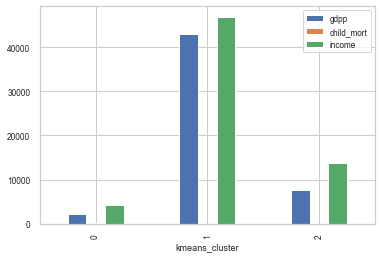

In [408]:
df[['gdpp','child_mort','income']].groupby(df['kmeans_cluster']).mean().plot(kind='bar')

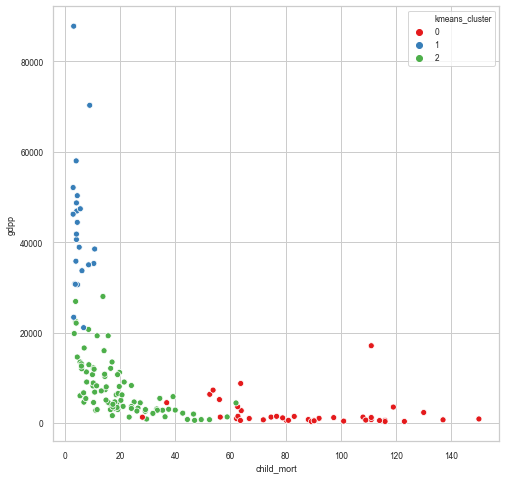

In [409]:
plt.figure(figsize=[8,8])
sns.scatterplot(x='child_mort',y='gdpp',hue='kmeans_cluster',legend='full',data=df,palette='Set1')
plt.show()

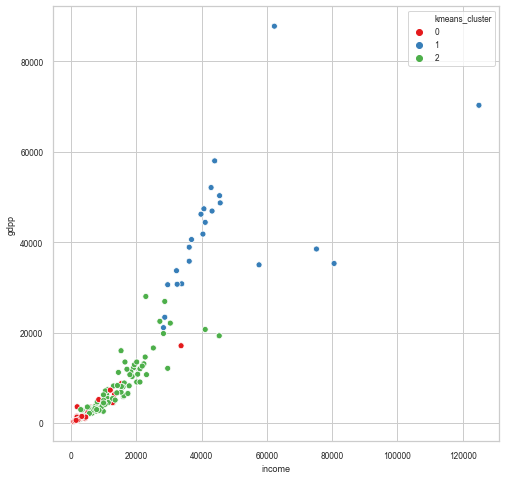

In [410]:
plt.figure(figsize=[8,8])
sns.scatterplot(x='income',y='gdpp',hue='kmeans_cluster',legend='full',data=df,palette='Set1')
plt.show()

In [411]:
df[df['kmeans_cluster']==0].sort_values(by=['gdpp','income','child_mort'], ascending=[True,True,False])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_cluster
88,Liberia,89.3,62.457,38.5860,302.802,700,5.470,60.8,5.02,327,0
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609,20.800,57.5,6.54,334,0
112,Niger,123.0,77.256,17.9568,170.868,814,2.550,58.8,7.49,348,0
106,Mozambique,101.0,131.985,21.8299,193.578,918,7.640,54.5,5.56,419,0
94,Malawi,90.5,104.652,30.2481,160.191,1030,12.100,53.1,5.31,459,0
150,Togo,90.3,196.176,37.3320,279.624,1210,1.180,58.7,4.87,488,0
64,Guinea-Bissau,114.0,81.503,46.4950,192.544,1390,2.970,55.6,5.05,547,0
0,Afghanistan,90.2,55.300,41.9174,248.297,1610,9.440,56.2,5.82,553,0
56,Gambia,80.3,133.756,31.9778,239.974,1660,4.300,65.5,5.71,562,0
126,Rwanda,63.6,67.560,59.1150,168.900,1350,2.610,64.6,4.51,563,0


In [454]:
list(df[df['kmeans_cluster']==0].sort_values(by=['gdpp','income','child_mort'], ascending=[True,True,False])['country'])

['Liberia',
 'Congo, Dem. Rep.',
 'Niger',
 'Mozambique',
 'Malawi',
 'Togo',
 'Guinea-Bissau',
 'Afghanistan',
 'Gambia',
 'Rwanda',
 'Burkina Faso',
 'Uganda',
 'Guinea',
 'Tanzania',
 'Mali',
 'Benin',
 'Comoros',
 'Chad',
 'Kenya',
 'Senegal',
 'Pakistan',
 'Lao',
 'Mauritania',
 "Cote d'Ivoire",
 'Solomon Islands',
 'Cameroon',
 'Ghana',
 'Yemen',
 'Zambia',
 'Sudan',
 'Kiribati',
 'Nigeria',
 'Congo, Rep.',
 'Angola',
 'Timor-Leste',
 'Iraq',
 'Namibia',
 'Botswana',
 'South Africa',
 'Gabon',
 'Equatorial Guinea']

## 7.Hierarchical Clustering Single Method

#### Lets Scale the data and create a fresh new dataframe.

In [413]:
scaler=StandardScaler()
df_hierarchial_scaled=scaler.fit_transform(df_country_drop)
df_hierarchial_scaled

array([[ 1.50687316, -0.6252527 , -0.5792463 , ..., -1.91085828,
         1.92794462, -0.7089661 ],
       [-0.53911216, -0.50480619, -0.42601367, ...,  0.694718  ,
        -0.85567365, -0.47980434],
       [-0.24166592, -0.44209753, -0.48155787, ...,  0.72064413,
        -0.02793104, -0.45583209],
       ...,
       [-0.35286078, -0.52712951, -0.5469106 , ...,  0.27989989,
        -0.65541334, -0.65992017],
       [ 0.56449677, -0.58793296, -0.5616563 , ..., -0.44603181,
         1.16028011, -0.65992017],
       [ 1.3095023 , -0.57166566, -0.5493585 , ..., -2.45530706,
         1.64758019, -0.65020169]])

In [414]:
df_hierarchial_scaled.shape

(152, 9)

In [415]:
df_hier_scaled=pd.DataFrame(df_hierarchial_scaled)
df_hier_scaled.columns = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
df_hier_scaled.head(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.506873,-0.625253,-0.579246,-0.670297,-0.829499,0.129043,-1.910858,1.927945,-0.708966
1,-0.539112,-0.504806,-0.426014,-0.433251,-0.357066,-0.325306,0.694718,-0.855674,-0.479804
2,-0.241666,-0.442098,-0.481558,-0.513286,-0.188422,0.740349,0.720644,-0.027931,-0.455832
3,2.307476,-0.388328,-0.539451,-0.497760,-0.585901,1.318610,-1.405299,2.154906,-0.516087
4,-0.714244,-0.017915,-0.108828,0.275126,0.163631,-0.605258,0.759533,-0.535257,0.045641


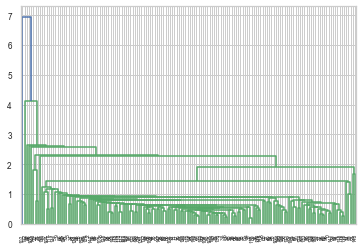

In [416]:
#single Linkage
mergings = linkage(df_hier_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

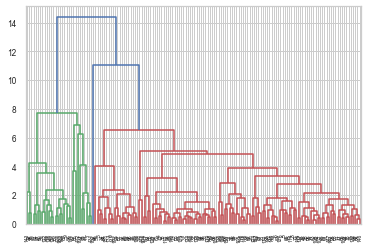

<Figure size 1440x1080 with 0 Axes>

In [417]:
# complete linkage
mergings = linkage(df_hier_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.figure(figsize=[20,15])
plt.show()

In [418]:
# we need 3 clusters after some hit and trial, 3 cluster best shows the data.
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [419]:
df_hier_scaled["hier_cluster"]=cluster_labels
df_hier_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,hier_cluster
0,1.506873,-0.625253,-0.579246,-0.670297,-0.829499,0.129043,-1.910858,1.927945,-0.708966,0
1,-0.539112,-0.504806,-0.426014,-0.433251,-0.357066,-0.325306,0.694718,-0.855674,-0.479804,0
2,-0.241666,-0.442098,-0.481558,-0.513286,-0.188422,0.740349,0.720644,-0.027931,-0.455832,0
3,2.307476,-0.388328,-0.539451,-0.497760,-0.585901,1.318610,-1.405299,2.154906,-0.516087,0
4,-0.714244,-0.017915,-0.108828,0.275126,0.163631,-0.605258,0.759533,-0.535257,0.045641,0
5,-0.597489,-0.416231,-0.041941,-0.479549,0.140918,1.180929,0.629903,-0.375049,-0.077459,0
6,-0.497414,-0.557348,-0.511599,-0.505352,-0.540475,-0.024242,0.305826,-0.828972,-0.536172,0
7,-0.881036,2.027510,2.890584,2.350954,1.532094,-0.657301,1.239167,-0.995856,2.293850,1
8,0.089139,-0.280919,-0.374820,-0.539391,-0.012395,0.529237,-0.238623,-0.675439,-0.366422,0
9,-0.616949,0.451649,0.890361,0.963353,0.379405,-0.773504,0.370641,-0.715491,1.069321,1


In [420]:
df["hier_cluster"] = cluster_labels
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_cluster,hier_cluster
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553,0,0
1,Albania,16.6,1145.2000,267.8950,1987.740,9930,4.490,76.3,1.65,4090,2,0
2,Algeria,27.3,1712.6400,185.9820,1400.440,12900,16.100,76.5,2.89,4460,2,0
3,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.400,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,5551.0000,735.6600,7185.800,19100,1.440,76.8,2.13,12200,2,0
5,Argentina,14.5,1946.7000,834.3000,1648.000,18700,20.900,75.8,2.37,10300,2,0
6,Armenia,18.1,669.7600,141.6800,1458.660,6700,7.770,73.3,1.69,3220,2,0
8,Austria,4.3,24059.7000,5159.0000,22418.200,43200,0.873,80.5,1.44,46900,1,1
9,Azerbaijan,39.2,3171.1200,343.3920,1208.880,16000,13.800,69.1,1.92,5840,2,0
10,Bahamas,13.8,9800.0000,2209.2000,12236.000,22900,-0.393,73.8,1.86,28000,2,1


In [421]:
df.hier_cluster.value_counts()

0    121
1     30
2      1
Name: hier_cluster, dtype: int64

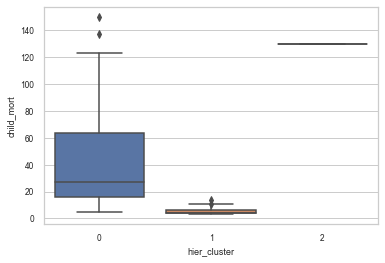

In [422]:
sns.boxplot(x="hier_cluster",y="child_mort",data=df)
plt.show()

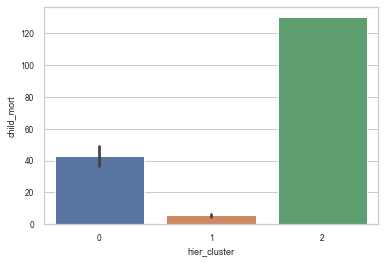

In [423]:
sns.barplot(x="hier_cluster",y="child_mort",data=df)
plt.show()

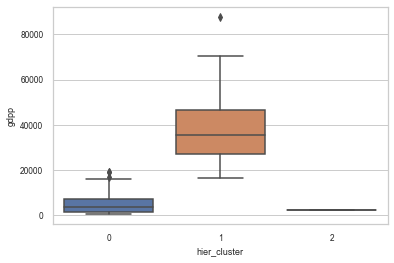

In [424]:
sns.boxplot(x="hier_cluster",y="gdpp",data=df)
plt.show()

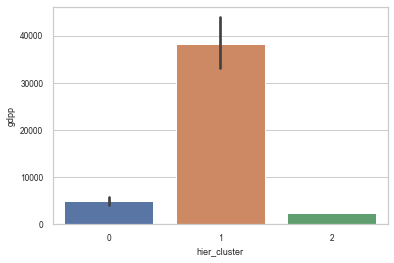

In [425]:
sns.barplot(x="hier_cluster",y="gdpp",data=df)
plt.show()

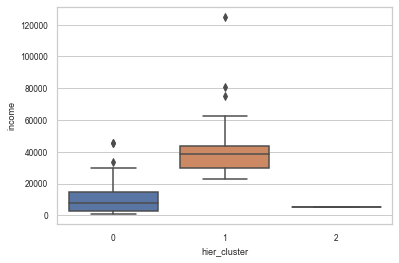

In [426]:
sns.boxplot(x="hier_cluster",y="income",data=df)
plt.show()

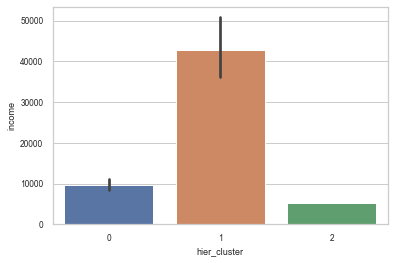

In [427]:
sns.barplot(x="hier_cluster",y="income",data=df)
plt.show()

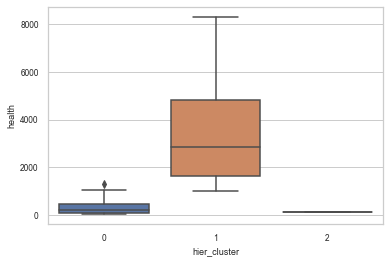

In [428]:
sns.boxplot(x="hier_cluster",y="health",data=df)
plt.show()

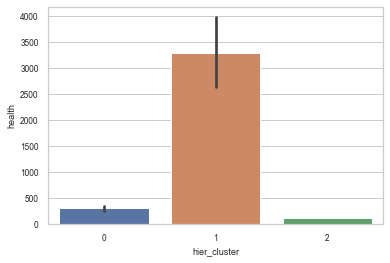

In [429]:
sns.barplot(x="hier_cluster",y="health",data=df)
plt.show()

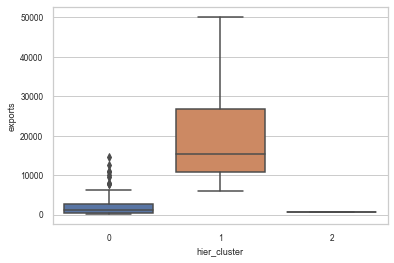

In [430]:
sns.boxplot(x="hier_cluster",y="exports",data=df)
plt.show()

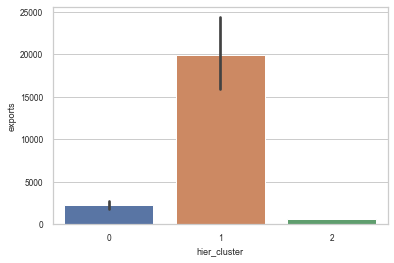

In [431]:
sns.barplot(x="hier_cluster",y="exports",data=df)
plt.show()

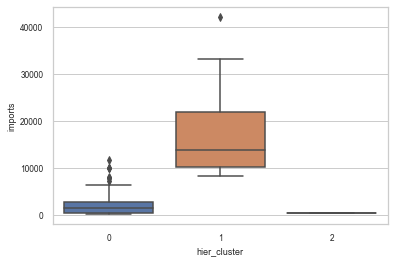

In [432]:
sns.boxplot(x="hier_cluster",y="imports",data=df)
plt.show()

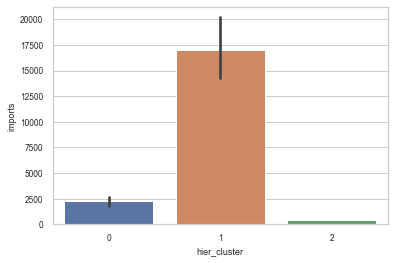

In [433]:
sns.barplot(x="hier_cluster",y="imports",data=df)
plt.show()

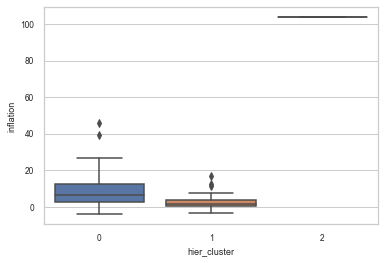

In [434]:
sns.boxplot(x="hier_cluster",y="inflation",data=df)
plt.show()

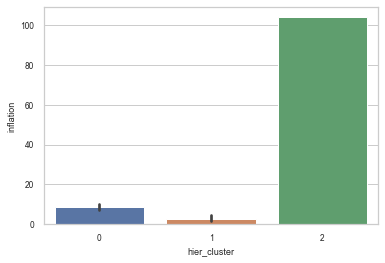

In [435]:
sns.barplot(x="hier_cluster",y="inflation",data=df)
plt.show()

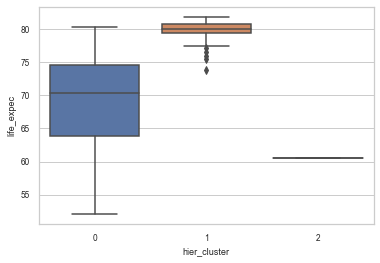

In [436]:
sns.boxplot(x="hier_cluster",y="life_expec",data=df)
plt.show()

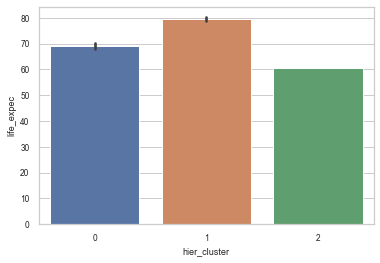

In [437]:
sns.barplot(x="hier_cluster",y="life_expec",data=df)
plt.show()

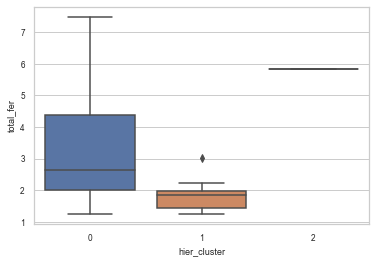

In [438]:
sns.boxplot(x="hier_cluster",y="total_fer",data=df)
plt.show()

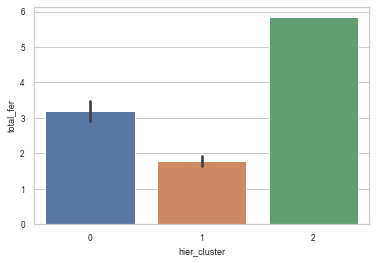

In [439]:
sns.barplot(x="hier_cluster",y="total_fer",data=df)
plt.show()

In [440]:
df.loc[df["hier_cluster"]==0]['country']

0                         Afghanistan
1                             Albania
2                             Algeria
3                              Angola
4                 Antigua and Barbuda
5                           Argentina
6                             Armenia
9                          Azerbaijan
12                         Bangladesh
13                           Barbados
14                            Belarus
16                             Belize
17                              Benin
18                             Bhutan
19                            Bolivia
20             Bosnia and Herzegovina
21                           Botswana
22                             Brazil
24                           Bulgaria
25                       Burkina Faso
27                           Cambodia
28                           Cameroon
30                         Cape Verde
32                               Chad
33                              Chile
34                              China
35          

In [441]:
df.loc[df["hier_cluster"]==1]['country']

8                   Austria
10                  Bahamas
11                  Bahrain
15                  Belgium
23                   Brunei
29                   Canada
42                   Cyprus
43           Czech Republic
44                  Denmark
53                  Finland
54                   France
58                  Germany
60                   Greece
73                  Ireland
74                   Israel
75                    Italy
82                   Kuwait
98                    Malta
110             Netherlands
111             New Zealand
114                  Norway
122                Portugal
123                   Qatar
134         Slovak Republic
135                Slovenia
138             South Korea
139                   Spain
144                  Sweden
157    United Arab Emirates
158          United Kingdom
Name: country, dtype: object

In [442]:
df.loc[df["hier_cluster"]==2]['country']

113    Nigeria
Name: country, dtype: object

In [443]:
df.groupby('hier_cluster').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_cluster
hier_cluster,,,,,,,,,,
0,42.770248,2227.164559,308.298671,2271.775405,9732.487603,8.522760,68.890909,3.194959,4959.446281,1.338843
1,5.526667,19943.853333,3293.097000,17002.760000,42746.666667,2.864367,79.556667,1.773667,38163.333333,1.233333
2,130.000000,589.490000,118.131000,405.420000,5150.000000,104.000000,60.500000,5.840000,2330.000000,0.000000


In [444]:
df.groupby('hier_cluster').apply(lambda x: x.sort_values('gdpp'))

country  child_mort     exports  \
hier_cluster                                                               
0            88                          Liberia        89.3     62.4570   
             37                 Congo, Dem. Rep.       116.0    137.2740   
             112                           Niger       123.0     77.2560   
             106                      Mozambique       101.0    131.9850   
             94                           Malawi        90.5    104.6520   
             150                            Togo        90.3    196.1760   
             64                    Guinea-Bissau       114.0     81.5030   
             0                       Afghanistan        90.2     55.3000   
             56                           Gambia        80.3    133.7560   
             126                          Rwanda        63.6     67.5600   
             25                     Burkina Faso       116.0    110.4000   
             109                           Nepal        47.0     56.7136   
             155                          Uganda        81.0    101.7450   
             63                           Guinea       109.0    196.3440   
             147                        Tanzania        71.9    131.2740   
             97                             Mali       137.0    161.4240   
             146                      Tajikistan        52.4    109.9620   
             17                            Benin       111.0    180.4040   
             12                       Bangladesh        49.4    121.2800   
             36                          Comoros        88.2    126.8850   
             27                         Cambodia        44.4    425.2260   
             83                  Kyrgyz Republic        29.6    454.0800   
             32                             Chad       150.0    330.0960   
             80                            Kenya        62.2    200.1690   
             129                         Senegal        66.8    249.0000   
             116                        Pakistan        92.1    140.4000   
             84                              Lao        78.9    403.5600   
             99                       Mauritania        97.4    608.4000   
             40                    Cote d'Ivoire       111.0    617.3200   
             136                 Solomon Islands        28.1    635.9700   
             164                         Vietnam        23.3    943.2000   
             28                         Cameroon       108.0    290.8200   
             165                           Yemen        56.3    393.0000   
             59                            Ghana        74.7    386.4500   
             69                            India        58.8    305.1000   
             161                      Uzbekistan        36.3    437.4600   
             166                          Zambia        83.1    540.2000   
             142                           Sudan        76.7    291.5600   
             81                         Kiribati        62.7    198.1700   
             102                         Moldova        17.2    638.9600   
             19                          Bolivia        46.6    815.7600   
             120                     Philippines        31.9    741.2400   
             18                           Bhutan        42.7    926.5000   
             47                            Egypt        29.1    553.8000   
             103                        Mongolia        26.1   1237.5500   
             38                      Congo, Rep.        63.9   2331.7400   
             140                       Sri Lanka        11.2    550.7600   
             62                        Guatemala        35.4    730.1400   
             105                         Morocco        33.5    911.2600   
             101           Micronesia, Fed. Sts.        40.0    672.1000   
             57                          Georgia        16.5   1036.0000   
             

In [445]:
df.groupby('hier_cluster').apply(lambda x: x.sort_values('income'))

country  child_mort     exports  \
hier_cluster                                                               
0            37                 Congo, Dem. Rep.       116.0    137.2740   
             88                          Liberia        89.3     62.4570   
             112                           Niger       123.0     77.2560   
             106                      Mozambique       101.0    131.9850   
             94                           Malawi        90.5    104.6520   
             63                           Guinea       109.0    196.3440   
             150                            Togo        90.3    196.1760   
             126                          Rwanda        63.6     67.5600   
             64                    Guinea-Bissau       114.0     81.5030   
             36                          Comoros        88.2    126.8850   
             25                     Burkina Faso       116.0    110.4000   
             155                          Uganda        81.0    101.7450   
             0                       Afghanistan        90.2     55.3000   
             56                           Gambia        80.3    133.7560   
             81                         Kiribati        62.7    198.1700   
             136                 Solomon Islands        28.1    635.9700   
             17                            Benin       111.0    180.4040   
             149                     Timor-Leste        62.6     79.2000   
             97                             Mali       137.0    161.4240   
             32                             Chad       150.0    330.0960   
             109                           Nepal        47.0     56.7136   
             147                        Tanzania        71.9    131.2740   
             146                      Tajikistan        52.4    109.9620   
             129                         Senegal        66.8    249.0000   
             12                       Bangladesh        49.4    121.2800   
             80                            Kenya        62.2    200.1690   
             27                         Cambodia        44.4    425.2260   
             28                         Cameroon       108.0    290.8200   
             40                    Cote d'Ivoire       111.0    617.3200   
             83                  Kyrgyz Republic        29.6    454.0800   
             162                         Vanuatu        29.2   1384.0200   
             59                            Ghana        74.7    386.4500   
             166                          Zambia        83.1    540.2000   
             99                       Mauritania        97.4    608.4000   
             101           Micronesia, Fed. Sts.        40.0    672.1000   
             142                           Sudan        76.7    291.5600   
             102                         Moldova        17.2    638.9600   
             84                              Lao        78.9    403.5600   
             161                      Uzbekistan        36.3    437.4600   
             116                        Pakistan        92.1    140.4000   
             69                            India        58.8    305.1000   
             165                           Yemen        56.3    393.0000   
             164                         Vietnam        23.3    943.2000   
             151                           Tonga        17.4    440.2000   
             38                      Congo, Rep.        63.9   2331.7400   
             127                           Samoa        18.9   1007.4000   
             19                          Bolivia        46.6    815.7600   
             120                     Philippines        31.9    741.2400   
             30                       Cape Verde        26.5   1082.3700   
             65                           Guyana        37.6   1562.5600   
             3                            Angola       119.0   2199.1900   
             

In [446]:
df.groupby('kmeans_cluster').apply(lambda x: x.sort_values('child_mort'))

country  child_mort     exports  \
kmeans_cluster                                                               
0              136                 Solomon Islands        28.1    635.9700   
               72                             Iraq        36.9   1773.0000   
               21                         Botswana        52.5   2768.6000   
               137                    South Africa        53.7   2082.0800   
               108                         Namibia        56.0   2480.8200   
               165                           Yemen        56.3    393.0000   
               80                            Kenya        62.2    200.1690   
               149                     Timor-Leste        62.6     79.2000   
               81                         Kiribati        62.7    198.1700   
               126                          Rwanda        63.6     67.5600   
               55                            Gabon        63.7   5048.7500   
               38                      Congo, Rep.        63.9   2331.7400   
               129                         Senegal        66.8    249.0000   
               147                        Tanzania        71.9    131.2740   
               59                            Ghana        74.7    386.4500   
               142                           Sudan        76.7    291.5600   
               84                              Lao        78.9    403.5600   
               56                           Gambia        80.3    133.7560   
               155                          Uganda        81.0    101.7450   
               166                          Zambia        83.1    540.2000   
               36                          Comoros        88.2    126.8850   
               88                          Liberia        89.3     62.4570   
               0                       Afghanistan        90.2     55.3000   
               150                            Togo        90.3    196.1760   
               94                           Malawi        90.5    104.6520   
               116                        Pakistan        92.1    140.4000   
               99                       Mauritania        97.4    608.4000   
               106                      Mozambique       101.0    131.9850   
               28                         Cameroon       108.0    290.8200   
               63                           Guinea       109.0    196.3440   
               49                Equatorial Guinea       111.0  14671.8000   
               17                            Benin       111.0    180.4040   
               40                    Cote d'Ivoire       111.0    617.3200   
               64                    Guinea-Bissau       114.0     81.5030   
               37                 Congo, Dem. Rep.       116.0    137.2740   
               25                     Burkina Faso       116.0    110.4000   
               3                            Angola       119.0   2199.1900   
               112                           Niger       123.0     77.2560   
               113                         Nigeria       130.0    589.4900   
               97                             Mali       137.0    161.4240   
               32                             Chad       150.0    330.0960   
1              144                          Sweden         3.0  24070.2000   
               53                          Finland         3.0  17879.4000   
               135                        Slovenia         3.2  15046.2000   
               114                          Norway         3.2  34856.6000   
               42                           Cyprus         3.6  15461.6000   
               139                           Spain         3.8   7828.5000   
               75                            Italy         4.0   9021.6000   
               44                          Denmark         4.1  29290.0000   
               54                           France         4.2  1

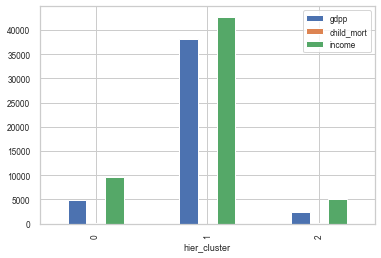

In [447]:
df[['gdpp','child_mort','income']].groupby(df['hier_cluster']).mean().plot(kind='bar')

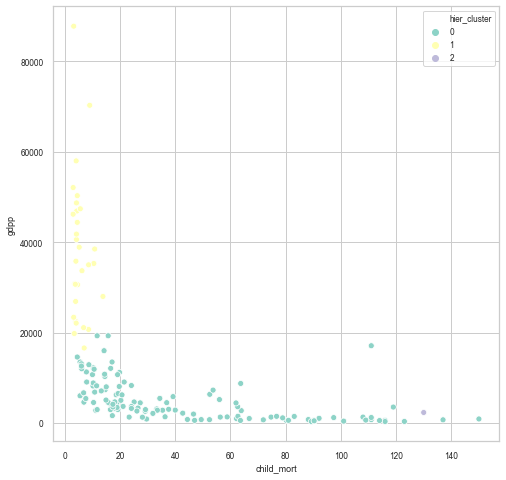

In [448]:
plt.figure(figsize=[8,8])
sns.scatterplot(x='child_mort',y='gdpp',hue='hier_cluster',legend='full',data=df,palette='Set3')
plt.show()

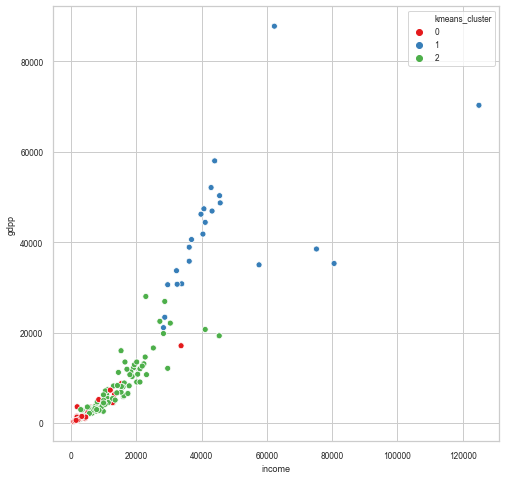

In [449]:
plt.figure(figsize=[8,8])
sns.scatterplot(x='income',y='gdpp',hue='kmeans_cluster',legend='full',data=df,palette='Set1')
plt.show()

In [450]:
df[df['hier_cluster']==2].sort_values(by=['gdpp','income','child_mort'], ascending=[True,True,False])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_cluster,hier_cluster
113,Nigeria,130.0,589.49,118.131,405.42,5150,104.0,60.5,5.84,2330,0,2


In [451]:
df[df['hier_cluster']==0].sort_values(by=['gdpp','income','child_mort'], ascending=[True,True,False]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_cluster,hier_cluster
88,Liberia,89.3,62.457,38.5860,302.802,700,5.47,60.8,5.02,327,0,0
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609,20.80,57.5,6.54,334,0,0
112,Niger,123.0,77.256,17.9568,170.868,814,2.55,58.8,7.49,348,0,0
106,Mozambique,101.0,131.985,21.8299,193.578,918,7.64,54.5,5.56,419,0,0
94,Malawi,90.5,104.652,30.2481,160.191,1030,12.10,53.1,5.31,459,0,0
150,Togo,90.3,196.176,37.3320,279.624,1210,1.18,58.7,4.87,488,0,0
64,Guinea-Bissau,114.0,81.503,46.4950,192.544,1390,2.97,55.6,5.05,547,0,0
0,Afghanistan,90.2,55.300,41.9174,248.297,1610,9.44,56.2,5.82,553,0,0
56,Gambia,80.3,133.756,31.9778,239.974,1660,4.30,65.5,5.71,562,0,0
126,Rwanda,63.6,67.560,59.1150,168.900,1350,2.61,64.6,4.51,563,0,0


In [452]:
list(df[df['hier_cluster']==0].sort_values(by=['gdpp','income','child_mort'], ascending=[True,True,False])['country'])

['Liberia',
 'Congo, Dem. Rep.',
 'Niger',
 'Mozambique',
 'Malawi',
 'Togo',
 'Guinea-Bissau',
 'Afghanistan',
 'Gambia',
 'Rwanda',
 'Burkina Faso',
 'Nepal',
 'Uganda',
 'Guinea',
 'Tanzania',
 'Mali',
 'Tajikistan',
 'Benin',
 'Bangladesh',
 'Comoros',
 'Cambodia',
 'Kyrgyz Republic',
 'Chad',
 'Kenya',
 'Senegal',
 'Pakistan',
 'Lao',
 'Mauritania',
 "Cote d'Ivoire",
 'Solomon Islands',
 'Cameroon',
 'Ghana',
 'Yemen',
 'Vietnam',
 'India',
 'Uzbekistan',
 'Zambia',
 'Sudan',
 'Kiribati',
 'Moldova',
 'Bolivia',
 'Philippines',
 'Bhutan',
 'Egypt',
 'Mongolia',
 'Congo, Rep.',
 'Sri Lanka',
 'Morocco',
 'Guatemala',
 'Micronesia, Fed. Sts.',
 'Georgia',
 'Vanuatu',
 'Ukraine',
 'El Salvador',
 'Guyana',
 'Indonesia',
 'Armenia',
 'Paraguay',
 'Cape Verde',
 'Samoa',
 'Angola',
 'Tonga',
 'Timor-Leste',
 'Fiji',
 'Jordan',
 'Albania',
 'Tunisia',
 'Belize',
 'Turkmenistan',
 'Algeria',
 'Iraq',
 'Macedonia, FYR',
 'China',
 'Bosnia and Herzegovina',
 'Ecuador',
 'Jamaica',
 'Peru',

----

### Conclusion from Hierarchial Clustering:
#### Cluster 0 - > Highest GDPP
#### Cluster 1 - >  Average GDPP
#### Cluster 2 - > Lowest GDPP

#### Countries in cluster 2 - > Have high Child Deaths under 5 years per 1000 children, Lowest Export and Import , Lowest Income of the citizens, Face Higher Inflation, have lowest life expectancy and low Health spendings for the population. The number of children coming from a family are huge in numbers.